## Importing Libraries

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
import cv2
import pytesseract
from scipy.stats import gaussian_kde
import warnings
warnings.filterwarnings('ignore')

## Importing Data in df

In [293]:
df=pd.read_csv("prosperLoanData.csv")

## Top five rows of data

In [294]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Bottom Five Rows of Data

In [295]:
df.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


## Selecting Important Columns

In [296]:
# Select the  columns relevant to loan status
loan_status_cols = ['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'IncomeRange','Investors', 'LoanOriginalAmount','AvailableBankcardCredit','MonthlyLoanPayment','ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper']

# Create a new DataFrame with only the loan status columns
df_loan_status = df[loan_status_cols]

df_loan_status.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,IncomeRange,Investors,LoanOriginalAmount,AvailableBankcardCredit,MonthlyLoanPayment,ListingCategory (numeric),EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper
0,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,"$25,000-49,999",258,9425,1500.0,330.43,0,Self-employed,True,640.0,659.0
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,"$50,000-74,999",1,10000,10266.0,318.93,2,Employed,False,680.0,699.0
2,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,Not displayed,41,3001,NaN,123.32,0,Not available,False,480.0,499.0
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,"$25,000-49,999",158,10000,30754.0,321.45,16,Employed,True,800.0,819.0
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,"$100,000+",20,15000,695.0,563.97,2,Employed,True,680.0,699.0


## Data Info

In [297]:
df_loan_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ClosedDate                 55089 non-null   object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   LenderYield                113937 non-null  float64
 7   IncomeRange                113937 non-null  object 
 8   Investors                  113937 non-null  int64  
 9   LoanOriginalAmount         113937 non-null  int64  
 10  AvailableBankcardCredit    106393 non-null  float64
 11  MonthlyLoanPayment         113937 non-null  float64
 12  ListingCategory (numeric)  113937 non-null  int64  
 13  EmploymentStatus           11

## Converting Object Type variable in Their Perticular Format

In [298]:
df_loan_status['ListingCreationDate']=pd.to_datetime(df_loan_status['ListingCreationDate'])
df_loan_status['ClosedDate']=pd.to_datetime(df_loan_status['ClosedDate'])

## Dataset After Converting Data in Correct Formats

In [299]:
df_loan_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   Term                       113937 non-null  int64         
 2   LoanStatus                 113937 non-null  object        
 3   ClosedDate                 55089 non-null   datetime64[ns]
 4   BorrowerAPR                113912 non-null  float64       
 5   BorrowerRate               113937 non-null  float64       
 6   LenderYield                113937 non-null  float64       
 7   IncomeRange                113937 non-null  object        
 8   Investors                  113937 non-null  int64         
 9   LoanOriginalAmount         113937 non-null  int64         
 10  AvailableBankcardCredit    106393 non-null  float64       
 11  MonthlyLoanPayment         113937 non-null  float64 

## Dataset shape(rows, columns)

In [300]:
print(f"Dataset has {df_loan_status.shape[0]} rows")
print(f"Dataset has {df_loan_status.shape[1]} columns")

Dataset has 113937 rows
Dataset has 17 columns


## Count of number of null values in each row

In [301]:
df_loan_status.isnull().sum()

ListingCreationDate              0
Term                             0
LoanStatus                       0
ClosedDate                   58848
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
IncomeRange                      0
Investors                        0
LoanOriginalAmount               0
AvailableBankcardCredit       7544
MonthlyLoanPayment               0
ListingCategory (numeric)        0
EmploymentStatus              2255
IsBorrowerHomeowner              0
CreditScoreRangeLower          591
CreditScoreRangeUpper          591
dtype: int64



## Dealing With Missing Values

The dataset contains null values for various variables, ranging from 0% to over 50%. The variables with the highest percentage of null values are ClosedDate (51.6%), EstimatedEffectiveYield (25.5%), EstimatedLoss (25.5%), EstimatedReturn (25.5%), ProsperRating (numeric) (25.5%), ProsperRating (Alpha) (25.5%), and ProsperScore (25.5%).

For the variable ClosedDate, it may not be necessary for the analysis, as it represents the date when a listing was closed. For the variables related to Prosper's internal ratings and scores, it may be possible to impute the null values using the median or mode.

For the variables related to Estimated Effective Yield, Estimated Loss, and Estimated Return, it may not be possible to impute the null values, as they are calculated based on Prosper's proprietary algorithms. In this case, we may need to drop the rows with null values or explore other options such as contacting Prosper to obtain the missing data.

For the variable EmploymentStatus, as the percentage of null values is relatively small (1.98%), we may be able to impute the null values using the mode.

For the variables CreditScoreRangeLower and CreditScoreRangeUpper, as the percentage of null values is relatively small (less than 1%), we may be able to impute the null values using the median.

In [302]:
for i in df_loan_status.columns:
    print(f"Percentage of Null values in {i} is    ::   {(df_loan_status[i].isnull().sum()/df_loan_status.shape[0])*100}")

Percentage of Null values in ListingCreationDate is    ::   0.0
Percentage of Null values in Term is    ::   0.0
Percentage of Null values in LoanStatus is    ::   0.0
Percentage of Null values in ClosedDate is    ::   51.64959582927408
Percentage of Null values in BorrowerAPR is    ::   0.02194195037608503
Percentage of Null values in BorrowerRate is    ::   0.0
Percentage of Null values in LenderYield is    ::   0.0
Percentage of Null values in IncomeRange is    ::   0.0
Percentage of Null values in Investors is    ::   0.0
Percentage of Null values in LoanOriginalAmount is    ::   0.0
Percentage of Null values in AvailableBankcardCredit is    ::   6.621202945487418
Percentage of Null values in MonthlyLoanPayment is    ::   0.0
Percentage of Null values in ListingCategory (numeric) is    ::   0.0
Percentage of Null values in EmploymentStatus is    ::   1.9791639239228696
Percentage of Null values in IsBorrowerHomeowner is    ::   0.0
Percentage of Null values in CreditScoreRangeLower

## This Visualization Shows Null Values in Dataset
The graph is a heatmap that displays the presence of missing values in the df_loan_status dataframe. The heatmap assigns different colors to the cells based on the value they represent. Here, the missing values are represented by True or 1, and non-missing values by False or 0. Thus, the graph shows the cells with missing values as **darker**, while the cells without missing values are displayed as **lighter**.

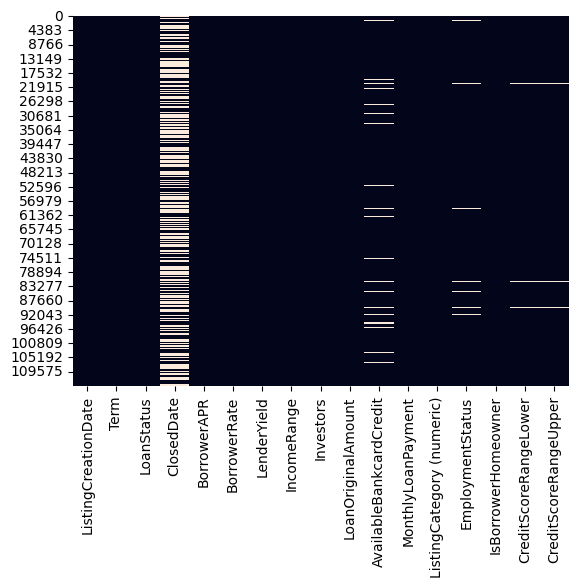

In [303]:
sns.heatmap(df_loan_status.isnull(), cbar=False)
plt.show()

## Droping ClosedDate
The variables with the highest percentage of null values are ClosedDate (51.6%).it may not be necessary for the analysis, as it represents the date when a listing was closed hence we will drop this column.

In [304]:
df_loan_status=df_loan_status.drop('ClosedDate',axis=1)

## Filling Numerical Null Values with Mean

In [305]:
for i in df_loan_status.select_dtypes(['int','float']).columns:
    df_loan_status[i].fillna(df_loan_status[i].mean(),inplace=True)

## Filling Categorical Null Values with Mode

In [306]:
for i in df_loan_status.select_dtypes(['object',]).columns:
    df_loan_status[i].fillna(df_loan_status[i].mode()[0],inplace=True)

## Dataset after Dealing With Null Values

In [307]:
for i in df_loan_status.columns:
    print(f"Percentage of Null values in {i} is \t \t  {(df_loan_status[i].isnull().sum()/df_loan_status.shape[0])*100}")

Percentage of Null values in ListingCreationDate is 	 	  0.0
Percentage of Null values in Term is 	 	  0.0
Percentage of Null values in LoanStatus is 	 	  0.0
Percentage of Null values in BorrowerAPR is 	 	  0.0
Percentage of Null values in BorrowerRate is 	 	  0.0
Percentage of Null values in LenderYield is 	 	  0.0
Percentage of Null values in IncomeRange is 	 	  0.0
Percentage of Null values in Investors is 	 	  0.0
Percentage of Null values in LoanOriginalAmount is 	 	  0.0
Percentage of Null values in AvailableBankcardCredit is 	 	  0.0
Percentage of Null values in MonthlyLoanPayment is 	 	  0.0
Percentage of Null values in ListingCategory (numeric) is 	 	  0.0
Percentage of Null values in EmploymentStatus is 	 	  0.0
Percentage of Null values in IsBorrowerHomeowner is 	 	  0.0
Percentage of Null values in CreditScoreRangeLower is 	 	  0.0
Percentage of Null values in CreditScoreRangeUpper is 	 	  0.0


## Duplicated Values

In [308]:
df_loan_status.duplicated().sum()

871

## Outliers in dataset

In [309]:
def removeout(file):
    for col in file.columns:
        if file[col].dtype=='float64' or file[col].dtype=='int':   
            q1,q3=file[col].quantile([0.25,0.75])
            IQR=q3-q1
            lower=q1-(1.5*IQR)
            upper=q3+(1.5*IQR)
            file[file[col]<lower]=np.nan
            file[file[col]>upper]=np.nan
    file.dropna(inplace=True)
    return file

In [310]:
df_loan_status=removeout(df_loan_status)
# df_loan_status=removeout(df_loan_status)
df_loan_status.shape

(70959, 16)

## Statistical Description

In [311]:
df_loan_status.select_dtypes(['int','float']).describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,Investors,LoanOriginalAmount,AvailableBankcardCredit,MonthlyLoanPayment,ListingCategory (numeric),CreditScoreRangeLower,CreditScoreRangeUpper
count,70959.000000,70959.000000,70959.000000,70959.000000,70959.000000,70959.000000,70959.000000,70959.000000,70959.000000,70959.000000,70959.000000
mean,40.854522,0.227098,0.200283,0.190220,63.525909,7156.923717,5836.311368,238.550426,1.339140,678.490869,697.490869
std,10.167720,0.076462,0.071209,0.070992,68.854833,4374.631062,6289.822088,135.773003,1.251857,46.463424,46.463424
min,12.000000,0.006530,0.000000,-0.010000,1.000000,1000.000000,0.000000,0.000000,0.000000,560.000000,579.000000
25%,36.000000,0.167320,0.144900,0.134900,1.000000,4000.000000,797.000000,134.520000,1.000000,640.000000,659.000000
50%,36.000000,0.218580,0.191400,0.181400,41.000000,6000.000000,3376.000000,204.100000,1.000000,680.000000,699.000000
75%,36.000000,0.287800,0.256600,0.246600,100.000000,10000.000000,9883.500000,335.690000,1.000000,700.000000,719.000000
max,60.000000,0.413550,0.400000,0.395000,284.000000,19725.000000,26729.000000,621.230000,6.000000,780.000000,799.000000


## Univariate analysis of BorrowerAPR

In [312]:
print(f"Mean Of BorrowerAPR is {df_loan_status['BorrowerAPR'].mean()}")
print(f"Mode Of BorrowerAPR is {df_loan_status['BorrowerAPR'].mode()}")
print(f"Max Of BorrowerAPR is {df_loan_status['BorrowerAPR'].max()}")
print(f"Min Of BorrowerAPR is {df_loan_status['BorrowerAPR'].min()}")
print(f"Std Of BorrowerAPR is {df_loan_status['BorrowerAPR'].std()}")
print(f"Var Of BorrowerAPR is {df_loan_status['BorrowerAPR'].var()}")

Mean Of BorrowerAPR is 0.22709842939440728
Mode Of BorrowerAPR is 0    0.35797
Name: BorrowerAPR, dtype: float64
Max Of BorrowerAPR is 0.41355
Min Of BorrowerAPR is 0.00653
Std Of BorrowerAPR is 0.07646195190278089
Var Of BorrowerAPR is 0.005846430088783179


## Distribution of Borrower APR
The histogram plot represents the distribution of the BorrowerAPR variable in the dataset. The data is divided into 15 bins, each representing a range of values for the BorrowerAPR variable. The frequency of observations falling within each bin is represented by the height of the bars.

The histogram shows that the distribution of BorrowerAPR is roughly bell-shaped with a peak between 0.12 and 0.27. The majority of the observations fall between 0.01 and 0.35, with a large concentration of observations around 0.17.

The histogram also shows that there are very few observations with BorrowerAPR above 0.35, with only a few observations in the last two bins representing APR ranges between 0.35 and 0.40. This indicates that the vast majority of borrowers have APRs below 0.35.

<Axes: xlabel='BorrowerAPR', ylabel='Count'>

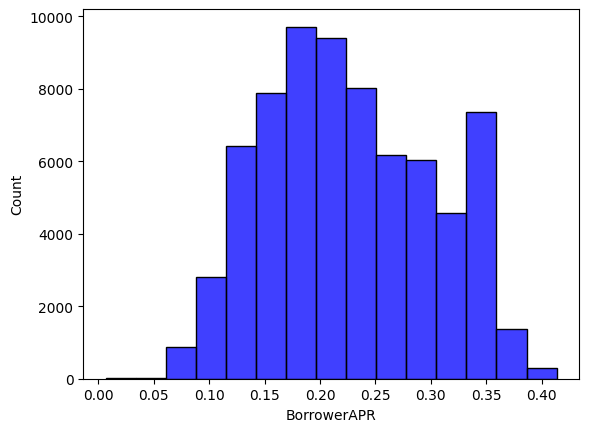

In [313]:
sns.histplot(df_loan_status['BorrowerAPR'],bins=15,multiple="stack", color='blue')

## KDE of Borrower APR

This KDE plot represents the probability density function of the Borrower APR variable. The Borrower APR variable is a continuous variable, which represents the interest rate of the loan for the borrower. The range of the Borrower APR variable is between 0% to 40%.

The KDE plot shows that the Borrower APR variable has a bimodal distribution, which means that there are two peaks in the distribution. The first peak is located around 0.1-0.15 and the second peak is located around 0.27-0.32.

The first peak indicates that a significant number of borrowers are getting loans with lower interest rates, which is good news for them. The second peak indicates that there is a significant number of borrowers getting loans with higher interest rates, which could be a concern for them.

The KDE plot also shows that the probability density function of the Borrower APR variable is relatively smooth, which indicates that the variable is normally distributed.

The analysis of the KDE plot suggests that there are two different groups of borrowers getting loans with different interest rates. This finding could be helpful for lenders to target borrowers with different interest rates, which could lead to better customer satisfaction and higher profits.


<Axes: xlabel='BorrowerAPR', ylabel='Density'>

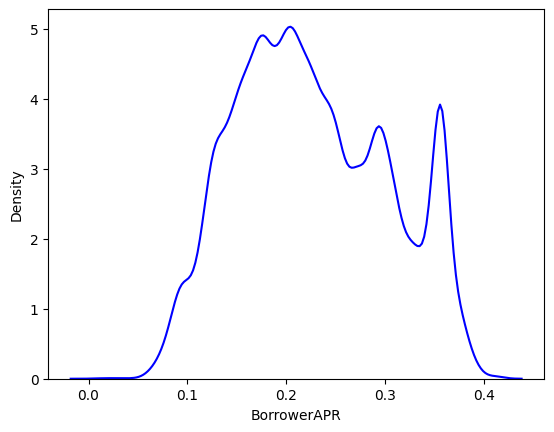

In [314]:
sns.kdeplot(df_loan_status['BorrowerAPR'], color='blue')

## Box Plot Analysis of BorrowerAPR
The box plot of this variable shows the following values: minimum value of 0.01647, first quartile (25th percentile) of 0.13604, median value of 0.17722, third quartile (75th percentile) of 0.23296, and maximum value of 0.36158.

The box plot of the Borrower APR variable shows that the values are distributed between the first and third quartiles, with a slight skew to the right. This indicates that the majority of the loans have a borrower APR between 0.13604 and 0.23296. The median value of 0.17722 suggests that the distribution is relatively symmetrical around this value.

The minimum value of 0.01647 indicates that there are some loans with very low borrower APRs, which may be due to certain promotions or discounts offered to specific borrowers. On the other hand, the maximum value of 0.36158 suggests that there are a few loans with very high borrower APRs, which may be due to higher risks associated with those loans.

In conclusion, the box plot analysis of the Borrower APR variable shows that the majority of the loans have a borrower APR between the first and third quartiles, with a slight skew to the right. The minimum and maximum values suggest that there are some loans with very low or very high borrower APRs, which may be due to certain promotions or higher risks associated with those loans.

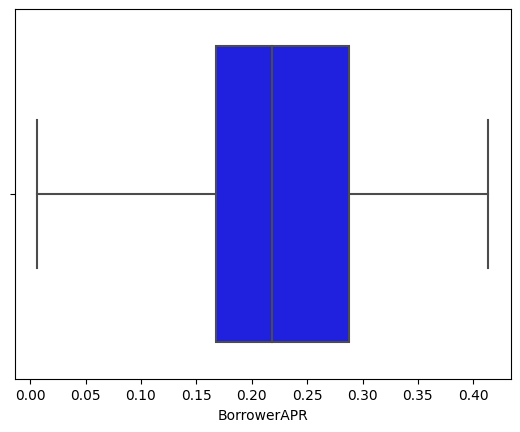

In [315]:
ax=sns.boxplot(x='BorrowerAPR',data=df_loan_status,color='blue')

## Report of Violine Plot
The violin plot shows that the Borrower APR variable has a bimodal distribution, which means that there are two peaks in the distribution. The first peak is located around 0.1-0.15 and the second peak is located around 0.27-0.32.

The violin plot of this variable shows minimum value of 0.01647, first quartile (25th percentile) of 0.13604, median value of 0.17722, third quartile (75th percentile) of 0.23296, and maximum value of 0.36158.


<Axes: >

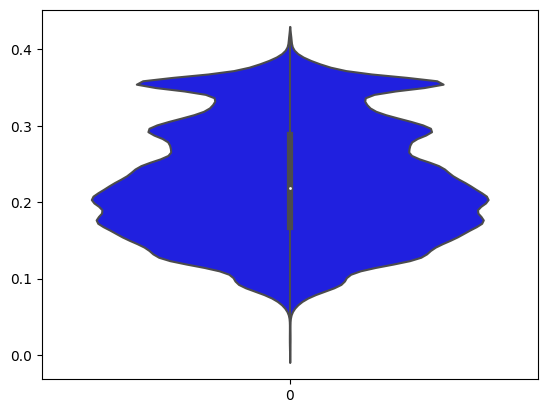

In [316]:
sns.violinplot(df_loan_status["BorrowerAPR"].values, color='blue')


## Univariate Analysis Of EmploymentStatus

In [317]:
print(f"Mode Of EmploymentStatus is {df_loan_status['EmploymentStatus'].mode()}")

Mode Of EmploymentStatus is 0    Employed
Name: EmploymentStatus, dtype: object


In [318]:
print(f"Unique Values in Employement Status are: \n{df_loan_status['EmploymentStatus'].unique()}")

Unique Values in Employement Status are: 
['Self-employed' 'Employed' 'Full-time' 'Not available' 'Other'
 'Not employed' 'Part-time' 'Retired']


In [319]:
print(f"Count by EmploymentStatus: \n {df_loan_status['EmploymentStatus'].value_counts()} ")

Count by EmploymentStatus: 
 Employed         42835
Full-time        16857
Self-employed     3987
Not available     2969
Other             2487
Part-time          827
Retired            501
Not employed       496
Name: EmploymentStatus, dtype: int64 


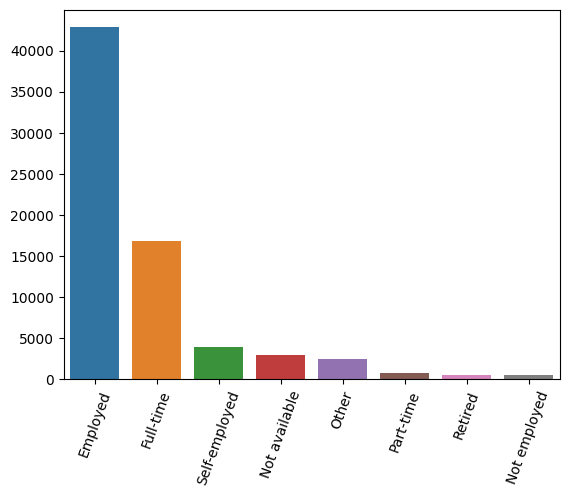

In [320]:
sns.barplot(y=df_loan_status['EmploymentStatus'].value_counts().values,
            x=df_loan_status['EmploymentStatus'].value_counts().index)
plt.tick_params('x',rotation=70)

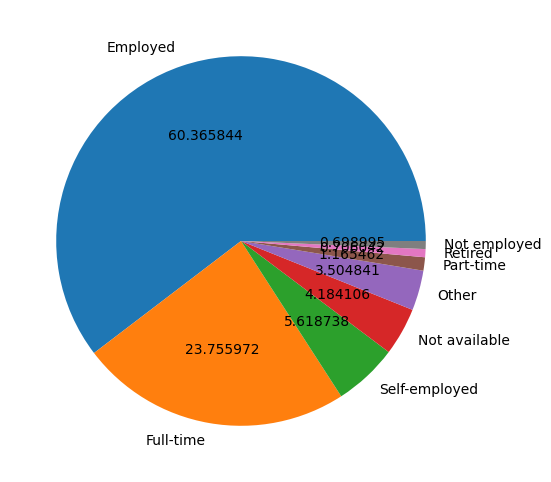

In [321]:
plt.figure(figsize=(6,6))
x=plt.pie(x=df_loan_status['EmploymentStatus'].value_counts().values,
          labels=df_loan_status['EmploymentStatus'].value_counts().index,autopct='%f')

## Univariate Analysis Of Loan Status

In [322]:
print(f"Mode Of LoanStatus is {df_loan_status['LoanStatus'].mode()}")

Mode Of LoanStatus is 0    Current
Name: LoanStatus, dtype: object


In [323]:
print(f"Unique Values in LoanStatus are: \n{df_loan_status['LoanStatus'].unique()}")

Unique Values in LoanStatus are: 
['Completed' 'Current' 'Past Due (1-15 days)' 'Chargedoff' 'Defaulted'
 'Past Due (61-90 days)' 'Past Due (31-60 days)' 'Past Due (16-30 days)'
 'Past Due (91-120 days)' 'FinalPaymentInProgress' 'Past Due (>120 days)'
 'Cancelled']


In [324]:
print(f"Count by LoanStatuss: \n {df_loan_status['LoanStatus'].value_counts()} ")

Count by LoanStatuss: 
 Current                   35527
Completed                 23655
Chargedoff                 7437
Defaulted                  2876
Past Due (1-15 days)        523
Past Due (31-60 days)       226
Past Due (61-90 days)       216
Past Due (91-120 days)      202
Past Due (16-30 days)       166
FinalPaymentInProgress      118
Past Due (>120 days)         10
Cancelled                     3
Name: LoanStatus, dtype: int64 


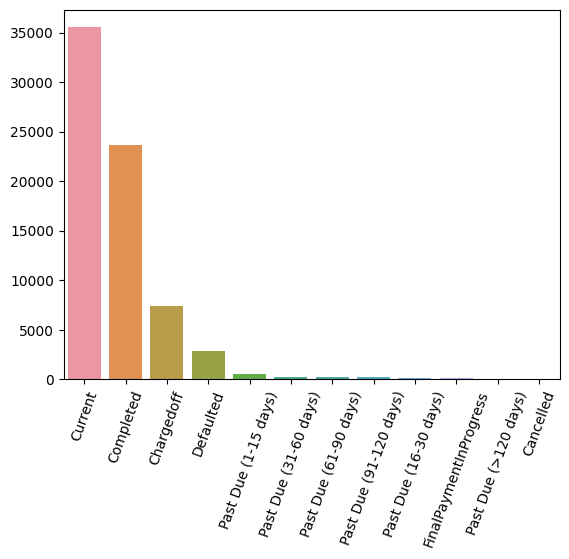

In [325]:
sns.barplot(y=df_loan_status['LoanStatus'].value_counts().values,
            x=df_loan_status['LoanStatus'].value_counts().index)
plt.tick_params('x',rotation=70)

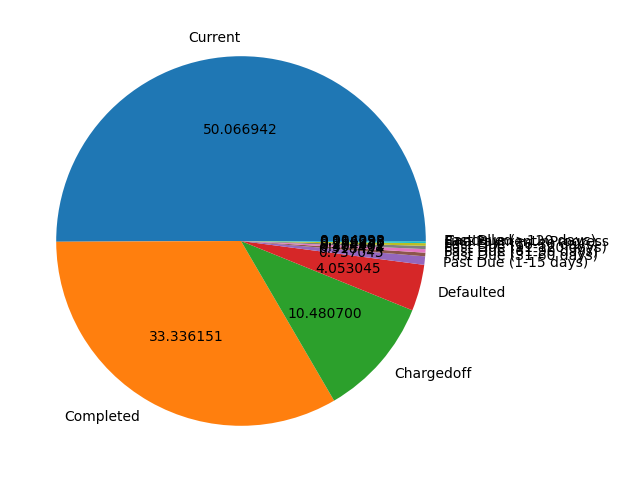

In [326]:
plt.figure(figsize=(6,6))
x=plt.pie(x=df_loan_status['LoanStatus'].value_counts().values,
          labels=df_loan_status['LoanStatus'].value_counts().index,autopct='%f')

## Univariate Analysis Of IsBorrowerHomeowner

In [327]:
print(f"Mode Of IsBorrowerHomeowner is {df_loan_status['IsBorrowerHomeowner'].mode()}")

Mode Of IsBorrowerHomeowner is 0    False
Name: IsBorrowerHomeowner, dtype: object


In [328]:
print(f"Unique Values in IsBorrowerHomeowner Status are: \n{df_loan_status['IsBorrowerHomeowner'].unique()}")

Unique Values in IsBorrowerHomeowner Status are: 
[True False]


In [329]:
print(f"Count by IsBorrowerHomeowner: \n {df_loan_status['IsBorrowerHomeowner'].value_counts()} ")

Count by IsBorrowerHomeowner: 
 False    37128
True     33831
Name: IsBorrowerHomeowner, dtype: int64 


<Axes: >

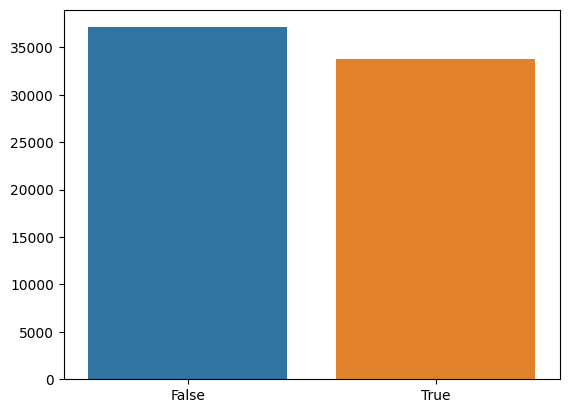

In [330]:
sns.barplot(y=df_loan_status['IsBorrowerHomeowner'].value_counts().values,
            x=df_loan_status['IsBorrowerHomeowner'].value_counts().index)

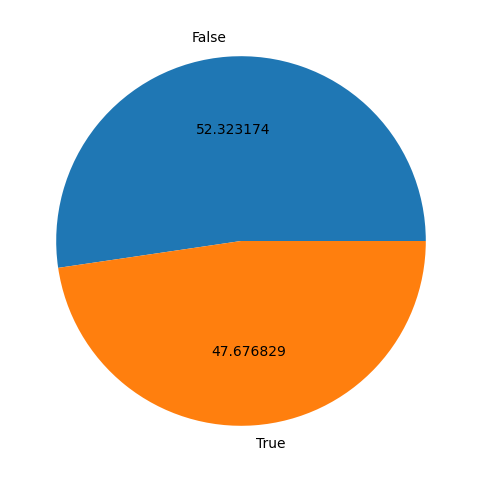

In [331]:
plt.figure(figsize=(6,6))
x=plt.pie(x=df_loan_status['IsBorrowerHomeowner'].value_counts().values,
          labels=df_loan_status['IsBorrowerHomeowner'].value_counts().index,autopct='%f')

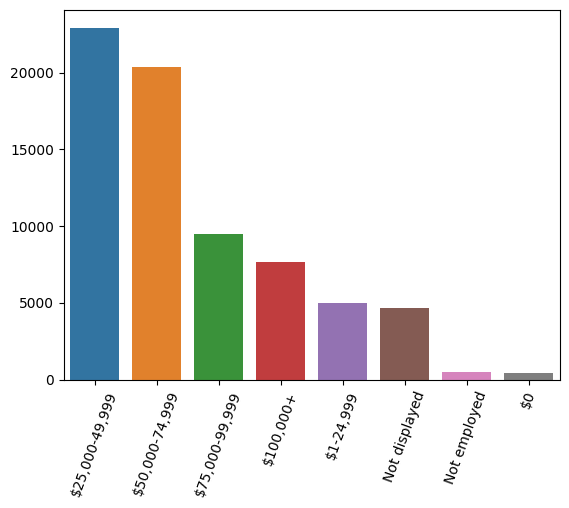

In [332]:
sns.barplot(y=df_loan_status['IncomeRange'].value_counts().values,
            x=df_loan_status['IncomeRange'].value_counts().index)
plt.tick_params('x',rotation=70)

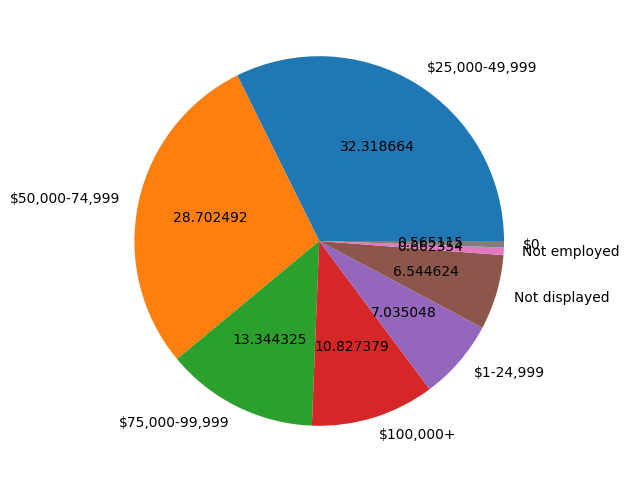

In [333]:
plt.figure(figsize=(6,6))
x=plt.pie(x=df_loan_status['IncomeRange'].value_counts().values,
          labels=df_loan_status['IncomeRange'].value_counts().index,autopct='%f')

## Univariate Analysis of BorrowerRate

In [334]:
print(f"Mean Of BorrowerRate is {df_loan_status['BorrowerRate'].mean()}")
print(f"Mode Of BorrowerRate is {df_loan_status['BorrowerRate'].mode()}")
print(f"Max Of BorrowerRate is {df_loan_status['BorrowerRate'].max()}")
print(f"Min Of BorrowerRate is {df_loan_status['BorrowerRate'].min()}")
print(f"Std Of BorrowerRate is {df_loan_status['BorrowerRate'].std()}")
print(f"Var Of BorrowerRate is {df_loan_status['BorrowerRate'].var()}")

Mean Of BorrowerRate is 0.20028255964712016
Mode Of BorrowerRate is 0    0.3177
Name: BorrowerRate, dtype: float64
Max Of BorrowerRate is 0.4
Min Of BorrowerRate is 0.0
Std Of BorrowerRate is 0.07120909543114147
Var Of BorrowerRate is 0.005070735272121414


<Axes: xlabel='BorrowerRate', ylabel='Count'>

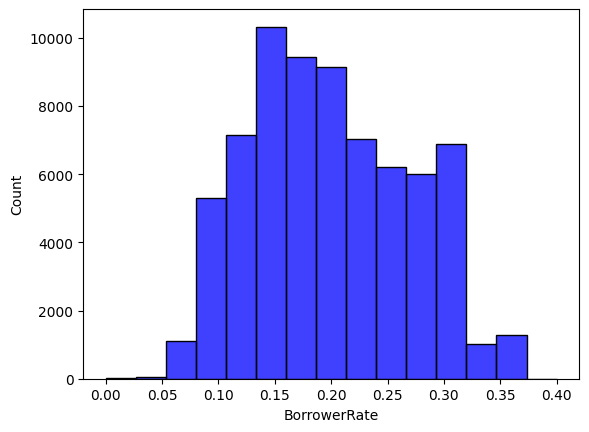

In [335]:
sns.histplot(df_loan_status['BorrowerRate'],bins=15,color='blue')

<Axes: xlabel='BorrowerRate', ylabel='Density'>

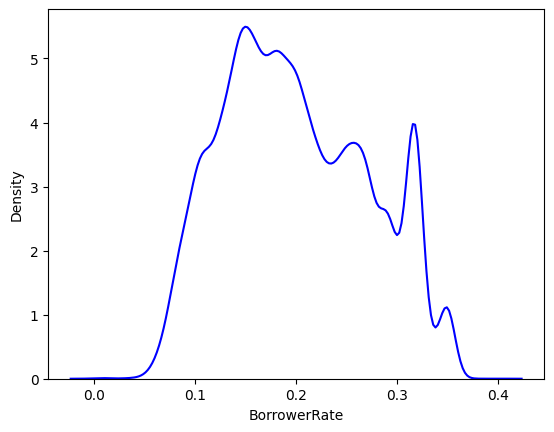

In [336]:
sns.kdeplot(df_loan_status['BorrowerRate'],color='blue')

<Axes: >

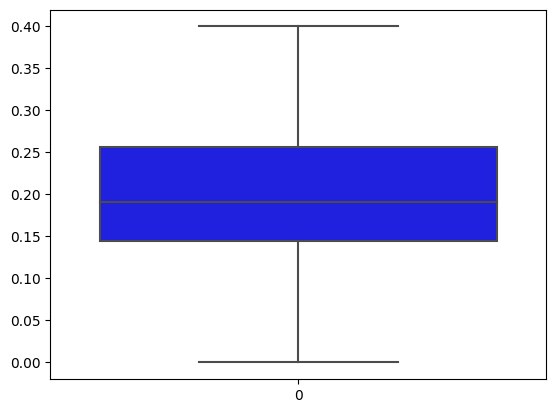

In [337]:
sns.boxplot(df_loan_status['BorrowerRate'],color='blue')

<Axes: >

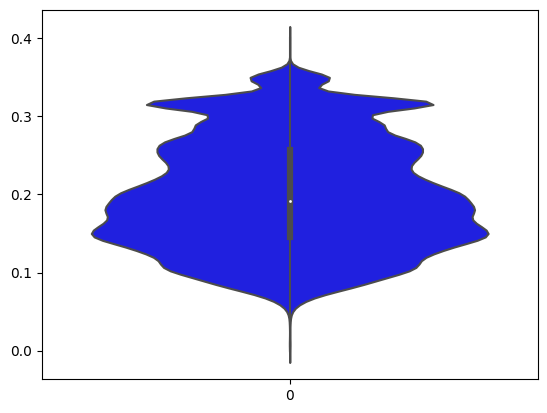

In [338]:
sns.violinplot(df_loan_status['BorrowerRate'],color='blue')

## Univariate Analysis of LenderYield

In [339]:
print(f"Mean Of LenderYield is {df_loan_status['LenderYield'].mean()}")
print(f"Mode Of LenderYield is {df_loan_status['LenderYield'].mode()}")
print(f"Max Of LenderYield is {df_loan_status['LenderYield'].max()}")
print(f"Min Of LenderYield is {df_loan_status['LenderYield'].min()}")
print(f"Std Of LenderYield is {df_loan_status['LenderYield'].std()}")
print(f"Var Of LenderYield is {df_loan_status['LenderYield'].var()}")

Mean Of LenderYield is 0.19022008483772318
Mode Of LenderYield is 0    0.3077
Name: LenderYield, dtype: float64
Max Of LenderYield is 0.395
Min Of LenderYield is -0.01
Std Of LenderYield is 0.07099198145904827
Var Of LenderYield is 0.0050398614314818525


<Axes: xlabel='LenderYield', ylabel='Count'>

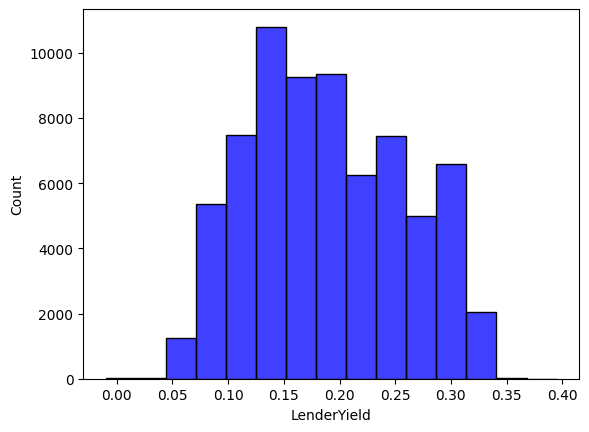

In [340]:
sns.histplot(df_loan_status['LenderYield'],bins=15,color='blue')

<Axes: xlabel='LenderYield', ylabel='Density'>

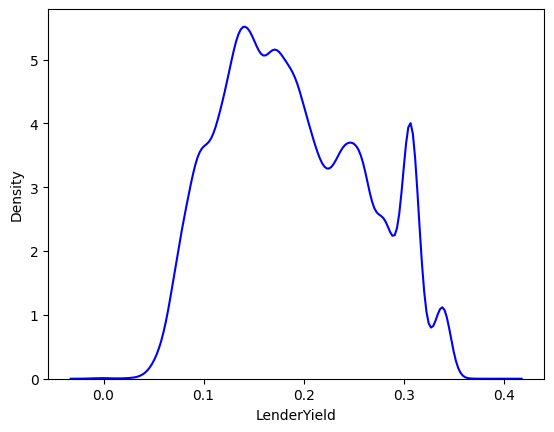

In [341]:
sns.kdeplot(df_loan_status['LenderYield'],color='blue')

<Axes: >

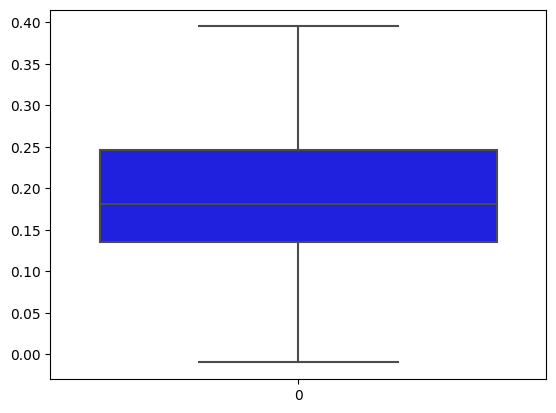

In [342]:
sns.boxplot(df_loan_status['LenderYield'],color='blue')

<Axes: >

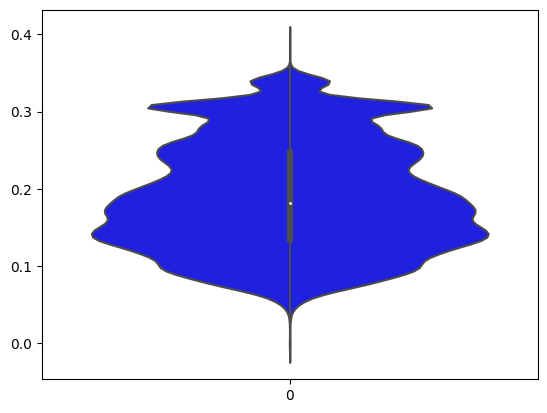

In [343]:
sns.violinplot(df_loan_status['LenderYield'],color='blue')

## Univariate Analysis of Investors

In [344]:
print(f"Mean Of Investors is {df_loan_status['Investors'].mean()}")
print(f"Mode Of Investors is {df_loan_status['Investors'].mode()}")
print(f"Max Of Investors is {df_loan_status['Investors'].max()}")
print(f"Min Of Investors is {df_loan_status['Investors'].min()}")
print(f"Std Of Investors is {df_loan_status['Investors'].std()}")
print(f"Var Of Investors is {df_loan_status['Investors'].var()}")

Mean Of Investors is 63.52590932792176
Mode Of Investors is 0    1.0
Name: Investors, dtype: float64
Max Of Investors is 284.0
Min Of Investors is 1.0
Std Of Investors is 68.85483337489693
Var Of Investors is 4740.98807908482


<Axes: xlabel='Investors', ylabel='Count'>

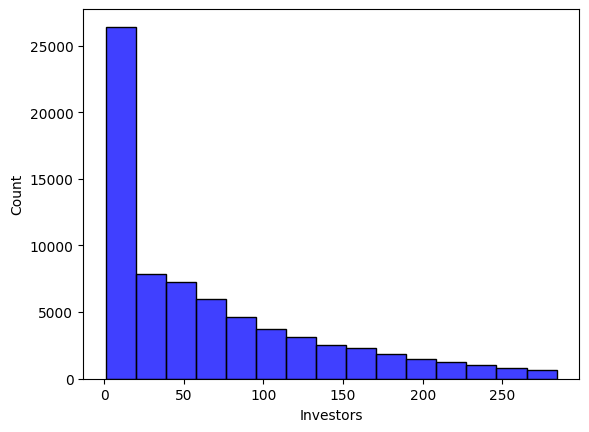

In [345]:
sns.histplot(df_loan_status['Investors'],bins=15,color='blue')

<Axes: xlabel='Investors', ylabel='Density'>

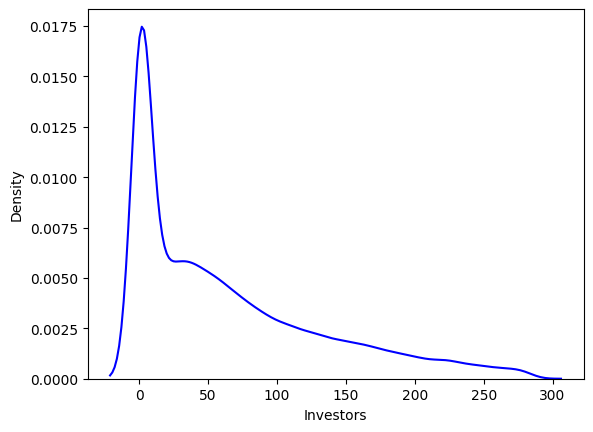

In [346]:
sns.kdeplot(df_loan_status['Investors'],color='blue')

<Axes: >

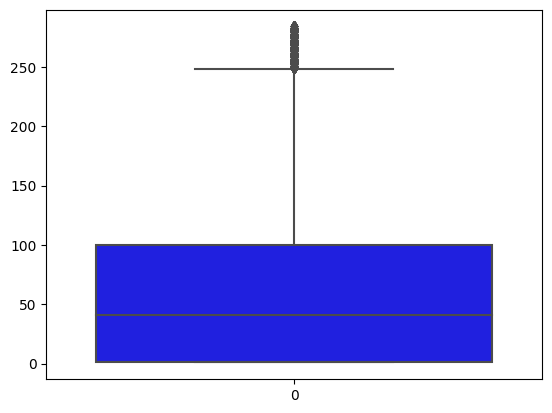

In [347]:
sns.boxplot(df_loan_status['Investors'],color='blue')

<Axes: >

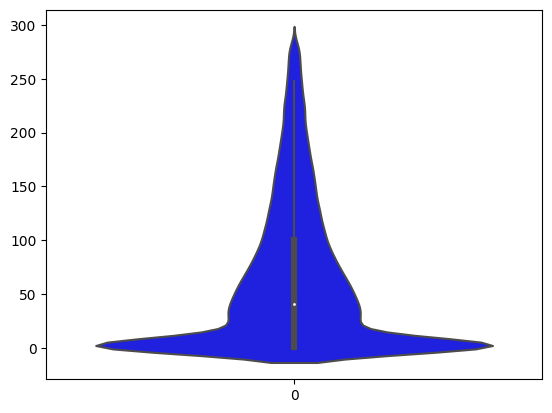

In [348]:
sns.violinplot(df_loan_status['Investors'],color='blue')

## Univariate Analysis of  LoanOriginalAmount

In [349]:
print(f"Mean Of LoanOriginalAmount is {df_loan_status['LoanOriginalAmount'].mean()}")
print(f"Mode Of LoanOriginalAmount is {df_loan_status['LoanOriginalAmount'].mode()}")
print(f"Max Of LoanOriginalAmount is {df_loan_status['LoanOriginalAmount'].max()}")
print(f"Min Of LoanOriginalAmount is {df_loan_status['LoanOriginalAmount'].min()}")
print(f"Std Of LoanOriginalAmount is {df_loan_status['LoanOriginalAmount'].std()}")
print(f"Var Of LoanOriginalAmount is {df_loan_status['LoanOriginalAmount'].var()}")

Mean Of LoanOriginalAmount is 7156.923716512352
Mode Of LoanOriginalAmount is 0    4000.0
Name: LoanOriginalAmount, dtype: float64
Max Of LoanOriginalAmount is 19725.0
Min Of LoanOriginalAmount is 1000.0
Std Of LoanOriginalAmount is 4374.631061944263
Var Of LoanOriginalAmount is 19137396.92812759


<Axes: xlabel='LoanOriginalAmount', ylabel='Count'>

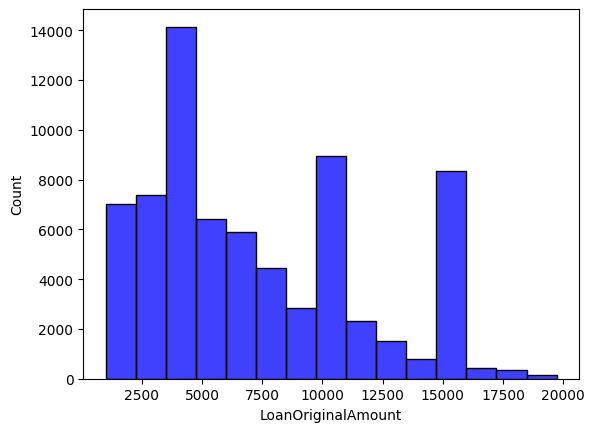

In [350]:
sns.histplot(df_loan_status['LoanOriginalAmount'],bins=15,color='blue')

<Axes: xlabel='LoanOriginalAmount', ylabel='Density'>

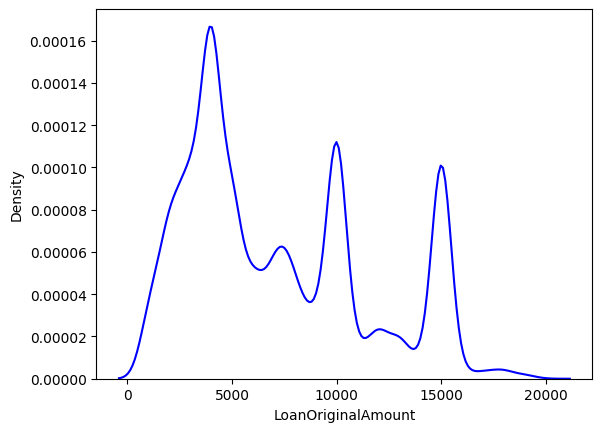

In [351]:
sns.kdeplot(df_loan_status['LoanOriginalAmount'],color='blue')

<Axes: >

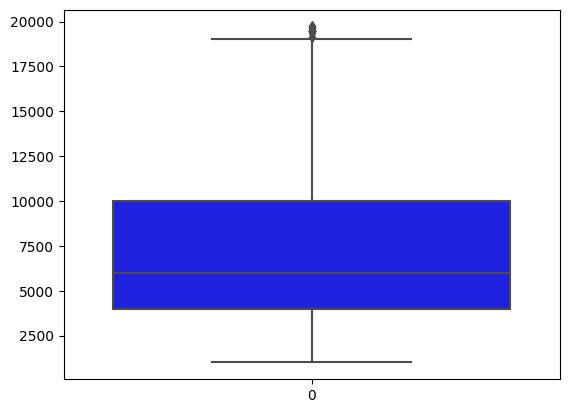

In [352]:
sns.boxplot(df_loan_status['LoanOriginalAmount'],color='blue')

<Axes: >

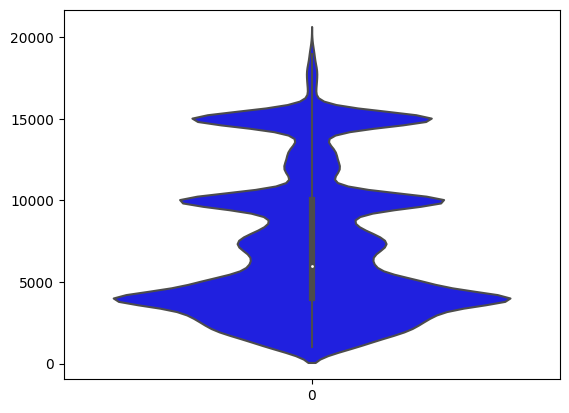

In [353]:
sns.violinplot(df_loan_status['LoanOriginalAmount'],color='blue')

## Univariate Analysis Of  AvailableBankcardCredit

In [354]:
print(f"Mean Of AvailableBankcardCredit is {df_loan_status['AvailableBankcardCredit'].mean()}")
print(f"Mode Of AvailableBankcardCredit is {df_loan_status['AvailableBankcardCredit'].mode()}")
print(f"Max Of AvailableBankcardCredit is {df_loan_status['AvailableBankcardCredit'].max()}")
print(f"Min Of AvailableBankcardCredit is {df_loan_status['AvailableBankcardCredit'].min()}")
print(f"Std Of AvailableBankcardCredit is {df_loan_status['AvailableBankcardCredit'].std()}")
print(f"Var Of AvailableBankcardCredit is {df_loan_status['AvailableBankcardCredit'].var()}")

Mean Of AvailableBankcardCredit is 5836.311367759336
Mode Of AvailableBankcardCredit is 0    11210.225447
Name: AvailableBankcardCredit, dtype: float64
Max Of AvailableBankcardCredit is 26729.0
Min Of AvailableBankcardCredit is 0.0
Std Of AvailableBankcardCredit is 6289.82208796075
Var Of AvailableBankcardCredit is 39561861.898198925


<Axes: xlabel='AvailableBankcardCredit', ylabel='Count'>

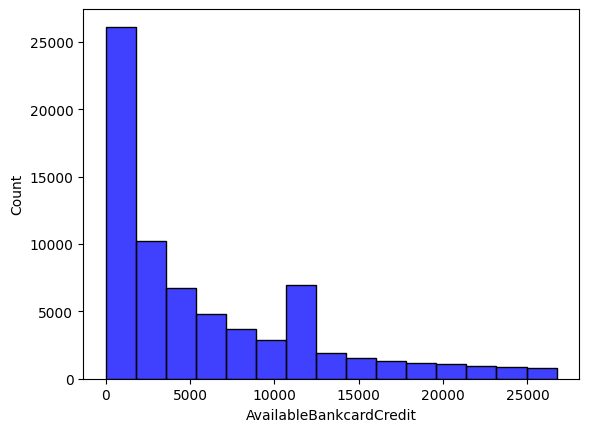

In [355]:
sns.histplot(df_loan_status['AvailableBankcardCredit'],bins=15,color='blue')

<Axes: xlabel='AvailableBankcardCredit', ylabel='Density'>

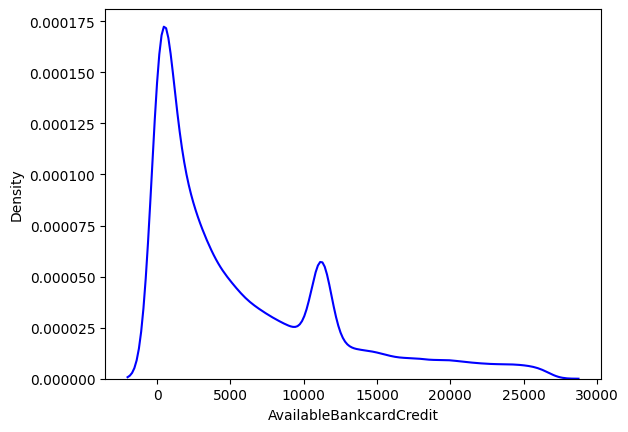

In [356]:
sns.kdeplot(df_loan_status['AvailableBankcardCredit'],color='blue')

<Axes: >

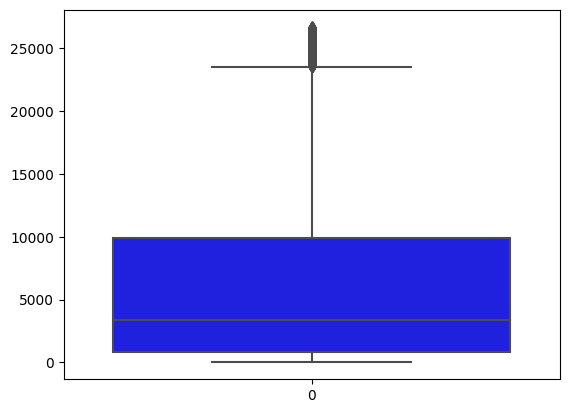

In [357]:
sns.boxplot(df_loan_status['AvailableBankcardCredit'],color='blue')

<Axes: >

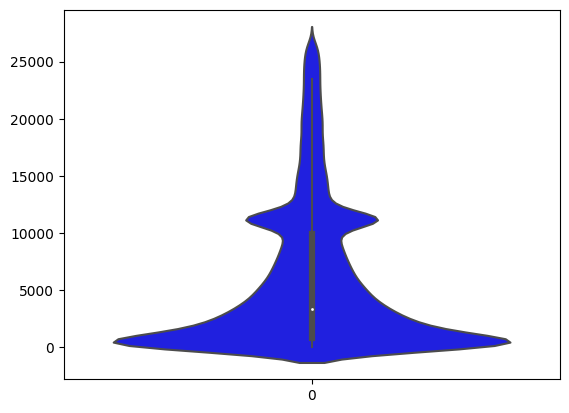

In [358]:
sns.violinplot(df_loan_status['AvailableBankcardCredit'],color='blue')

## Univariate Analysis of MonthlyLoanPayment

In [359]:
print(f"Mean Of MonthlyLoanPayment is {df_loan_status['MonthlyLoanPayment'].mean()}")
print(f"Mode Of MonthlyLoanPayment is {df_loan_status['MonthlyLoanPayment'].mode()}")
print(f"Max Of MonthlyLoanPayment is {df_loan_status['MonthlyLoanPayment'].max()}")
print(f"Min Of MonthlyLoanPayment is {df_loan_status['MonthlyLoanPayment'].min()}")
print(f"Std Of MonthlyLoanPayment is {df_loan_status['MonthlyLoanPayment'].std()}")
print(f"Var Of MonthlyLoanPayment is {df_loan_status['MonthlyLoanPayment'].var()}")

Mean Of MonthlyLoanPayment is 238.55042616158627
Mode Of MonthlyLoanPayment is 0    173.71
Name: MonthlyLoanPayment, dtype: float64
Max Of MonthlyLoanPayment is 621.23
Min Of MonthlyLoanPayment is 0.0
Std Of MonthlyLoanPayment is 135.77300320718143
Var Of MonthlyLoanPayment is 18434.308399897298


<Axes: xlabel='MonthlyLoanPayment', ylabel='Count'>

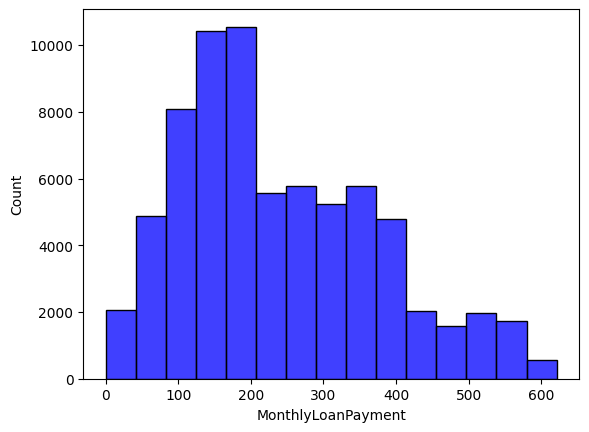

In [360]:
sns.histplot(df_loan_status['MonthlyLoanPayment'],bins=15,color='blue')

<Axes: xlabel='MonthlyLoanPayment', ylabel='Density'>

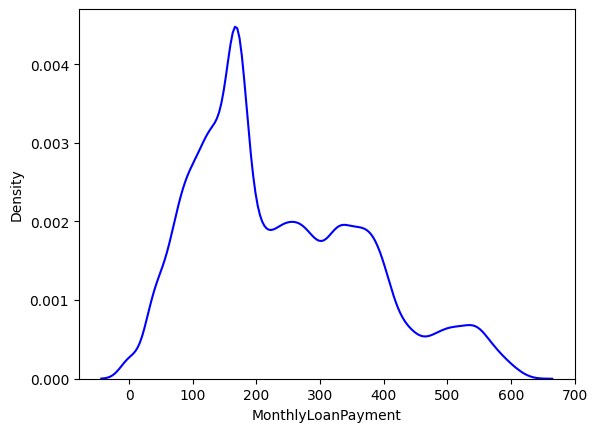

In [361]:
sns.kdeplot(df_loan_status['MonthlyLoanPayment'],color='blue')

<Axes: >

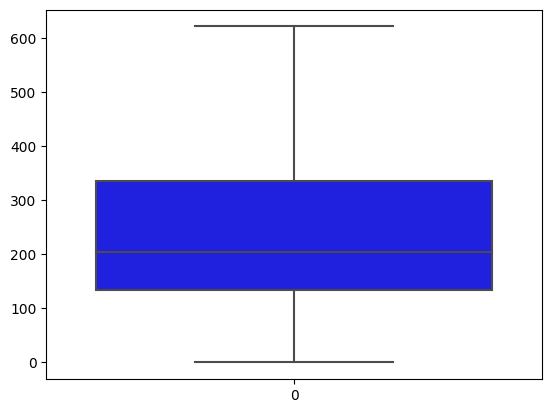

In [362]:
sns.boxplot(df_loan_status['MonthlyLoanPayment'],color='blue')

<Axes: >

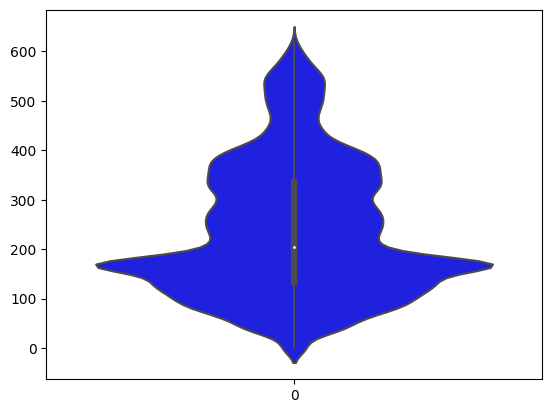

In [363]:
sns.violinplot(df_loan_status['MonthlyLoanPayment'],color='blue')

## Univaraite Analysis of ListingCategory (numeric)

<Axes: xlabel='ListingCategory (numeric)', ylabel='Count'>

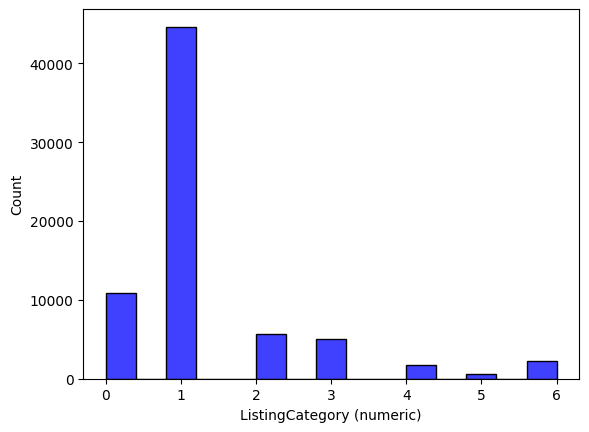

In [364]:
sns.histplot(df_loan_status['ListingCategory (numeric)'],bins=15,color='blue')

<Axes: xlabel='ListingCategory (numeric)', ylabel='Density'>

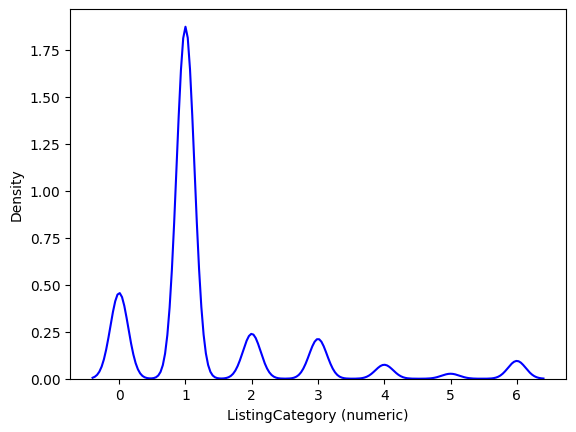

In [365]:
sns.kdeplot(df_loan_status['ListingCategory (numeric)'],color='blue')

<Axes: >

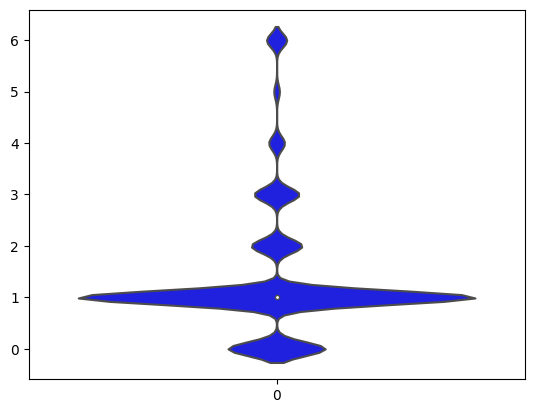

In [366]:
sns.violinplot(df_loan_status['ListingCategory (numeric)'],color='blue')

## Univariate Analysis Of CreditScoreRangeLower

In [367]:

print(f"Mode Of CreditScoreRangeLower is {df_loan_status['CreditScoreRangeLower'].mode()}")
print(f"Max Of CreditScoreRangeLower is {df_loan_status['CreditScoreRangeLower'].max()}")
print(f"Min Of CreditScoreRangeLower is {df_loan_status['CreditScoreRangeLower'].min()}")


Mode Of CreditScoreRangeLower is 0    660.0
Name: CreditScoreRangeLower, dtype: float64
Max Of CreditScoreRangeLower is 780.0
Min Of CreditScoreRangeLower is 560.0


<Axes: xlabel='CreditScoreRangeLower', ylabel='Count'>

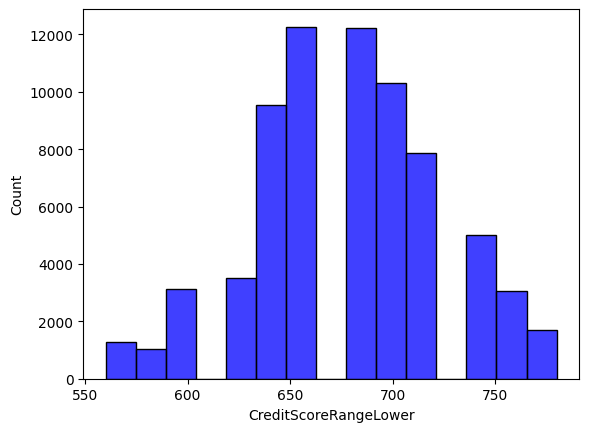

In [368]:
sns.histplot(df_loan_status['CreditScoreRangeLower'],bins=15,color='blue')

<Axes: xlabel='CreditScoreRangeLower', ylabel='Density'>

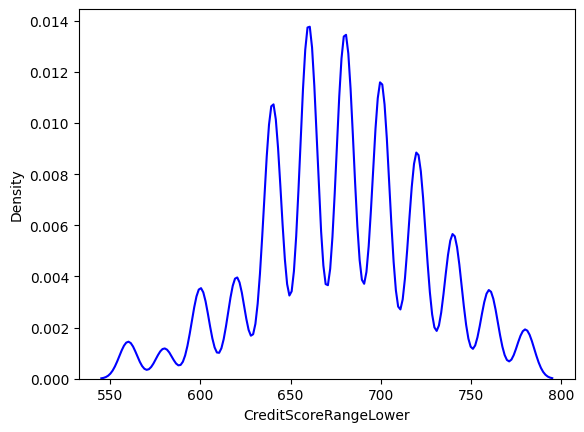

In [369]:
sns.kdeplot(df_loan_status['CreditScoreRangeLower'],color='blue')

<Axes: >

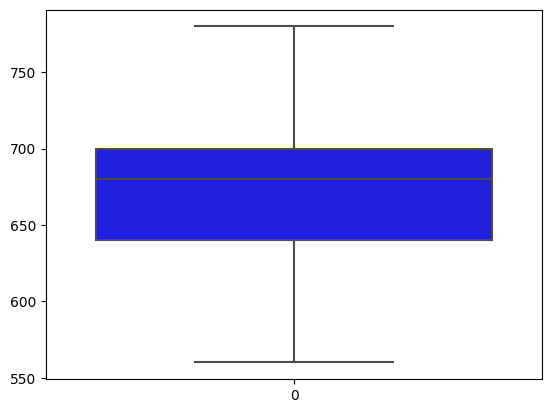

In [370]:
sns.boxplot(df_loan_status['CreditScoreRangeLower'],color='blue')

<Axes: >

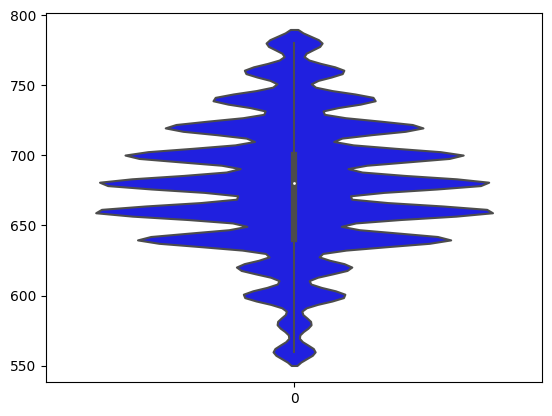

In [371]:
sns.violinplot(df_loan_status['CreditScoreRangeLower'],color='blue')

## Univariate Analysis Of  CreditScoreRangeUpper

In [372]:

print(f"Mode Of CreditScoreRangeUpper is {df_loan_status['CreditScoreRangeUpper'].mode()}")
print(f"Max Of CreditScoreRangeUpper is {df_loan_status['CreditScoreRangeUpper'].max()}")
print(f"Min Of CreditScoreRangeUpper is {df_loan_status['CreditScoreRangeUpper'].min()}")


Mode Of CreditScoreRangeUpper is 0    679.0
Name: CreditScoreRangeUpper, dtype: float64
Max Of CreditScoreRangeUpper is 799.0
Min Of CreditScoreRangeUpper is 579.0


<Axes: xlabel='CreditScoreRangeUpper', ylabel='Count'>

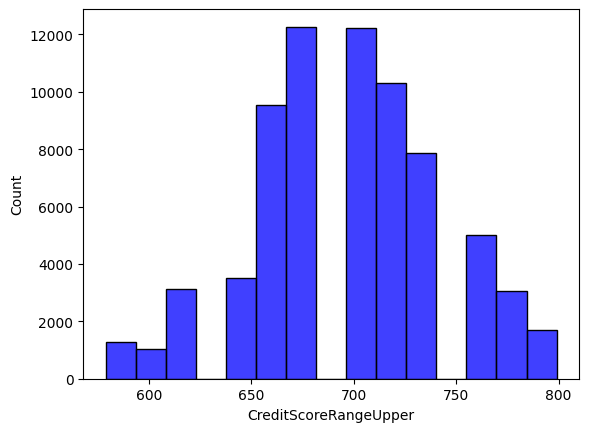

In [373]:
sns.histplot(df_loan_status['CreditScoreRangeUpper'],bins=15,color='blue')

<Axes: xlabel='CreditScoreRangeUpper', ylabel='Density'>

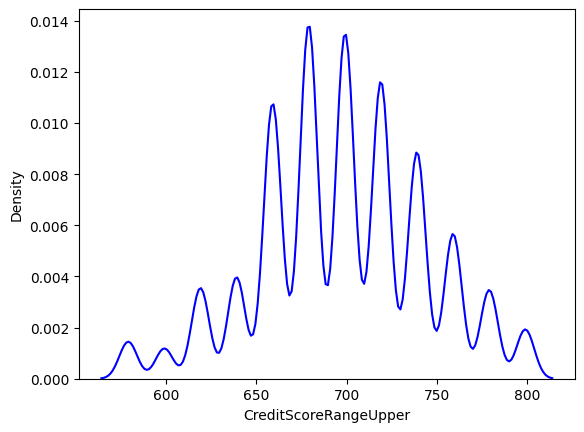

In [374]:
sns.kdeplot(df_loan_status['CreditScoreRangeUpper'],color='blue')

<Axes: >

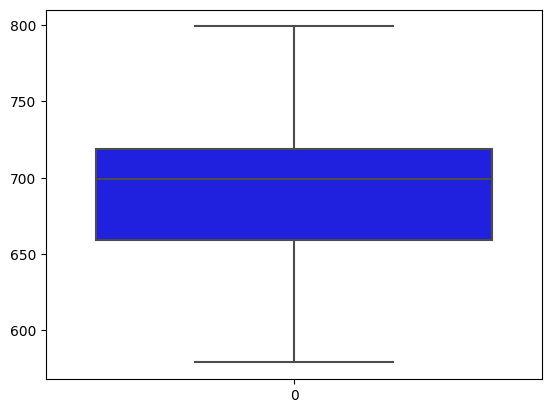

In [375]:
sns.boxplot(df_loan_status['CreditScoreRangeUpper'],color='blue')

<Axes: >

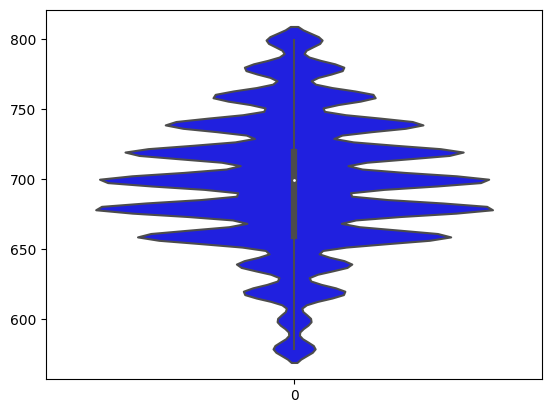

In [376]:
sns.violinplot(df_loan_status['CreditScoreRangeUpper'],color='blue')

## Bivariate Analysis Of BorrowerAPR with Loan Status

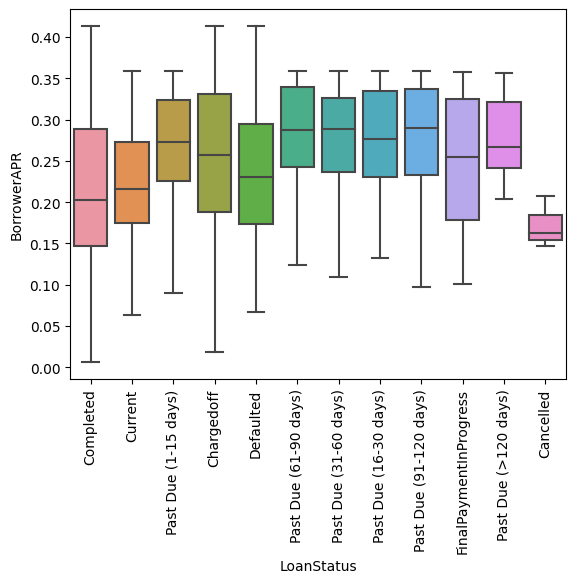

In [377]:
sns.boxplot(y=df_loan_status['BorrowerAPR'],x=df_loan_status['LoanStatus'])
plt.tick_params('x',rotation=90)

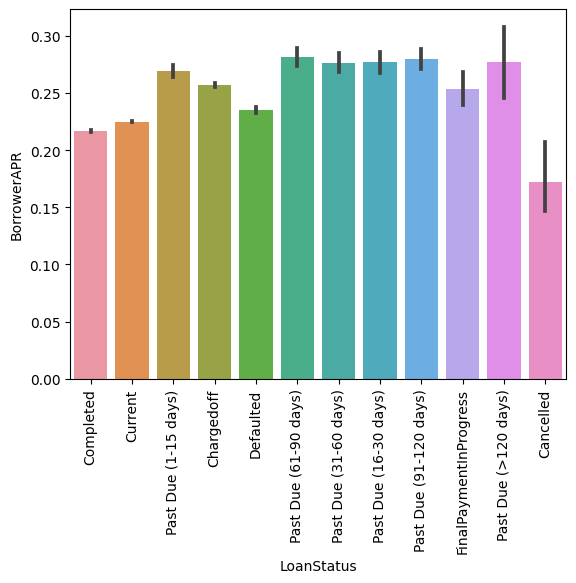

In [378]:
sns.barplot(y=df_loan_status['BorrowerAPR'],x=df_loan_status['LoanStatus'])
plt.tick_params('x',rotation=90)

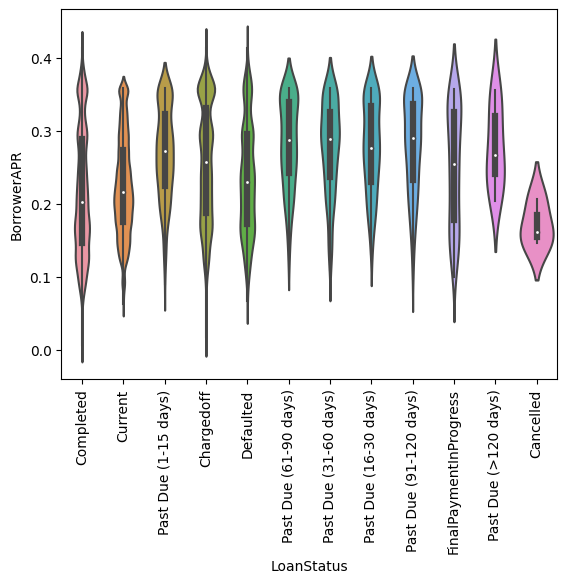

In [379]:
sns.violinplot(y=df_loan_status['BorrowerAPR'],x=df_loan_status['LoanStatus'])
plt.tick_params('x',rotation=90)

## Bivariate Analysis Of Term with BorrowerRate

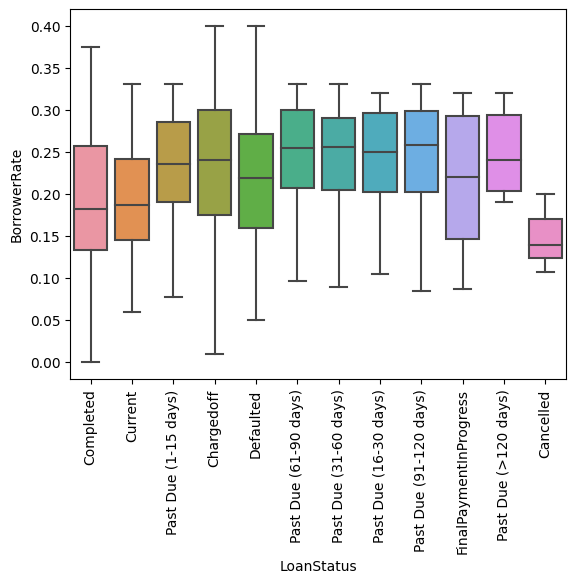

In [380]:
sns.boxplot(y=df_loan_status['BorrowerRate'],x=df_loan_status['LoanStatus'])
plt.tick_params('x',rotation=90)

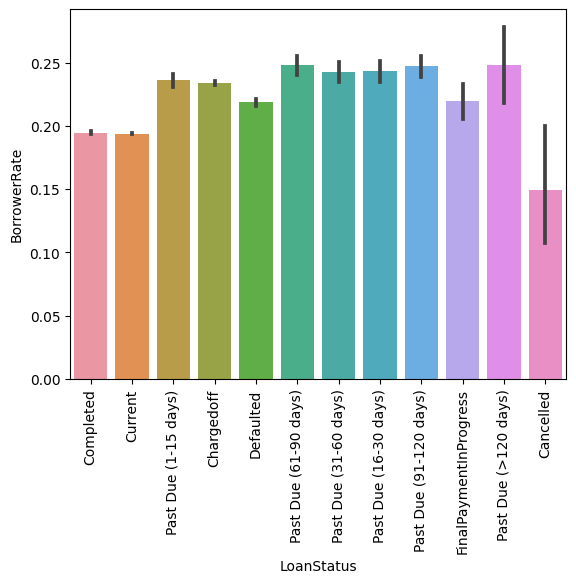

In [381]:
sns.barplot(y=df_loan_status['BorrowerRate'],x=df_loan_status['LoanStatus'])
plt.tick_params('x',rotation=90)

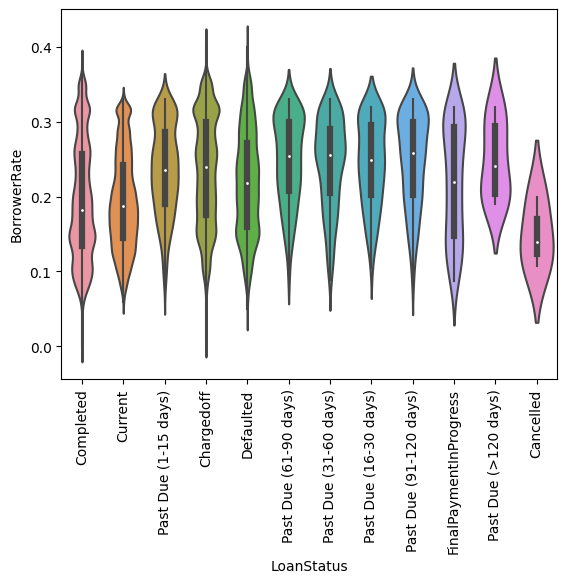

In [382]:
sns.violinplot(y=df_loan_status['BorrowerRate'],x=df_loan_status['LoanStatus'])
plt.tick_params('x',rotation=90)

## Bivariate Analysis of LoanStatus with LenderYield

<Axes: xlabel='LenderYield', ylabel='LoanStatus'>

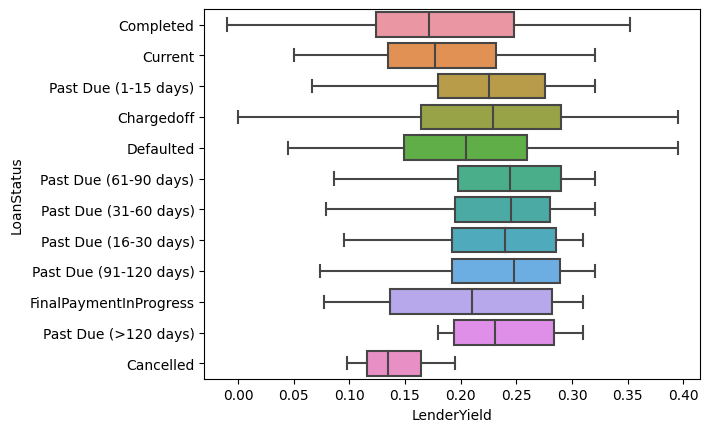

In [383]:
sns.boxplot(x='LenderYield',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='LenderYield', ylabel='LoanStatus'>

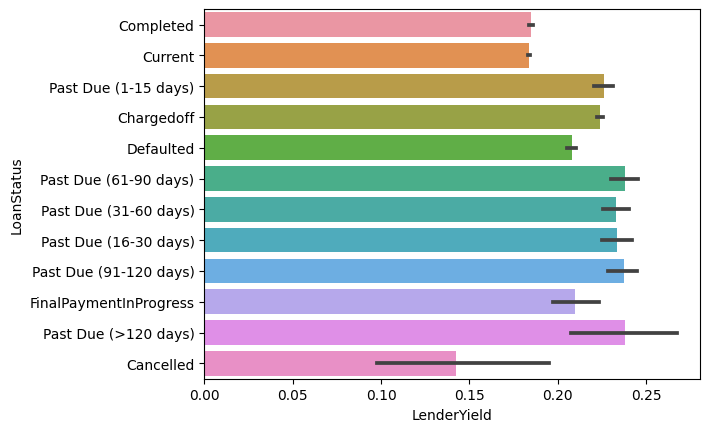

In [384]:
sns.barplot(x='LenderYield',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='LenderYield', ylabel='LoanStatus'>

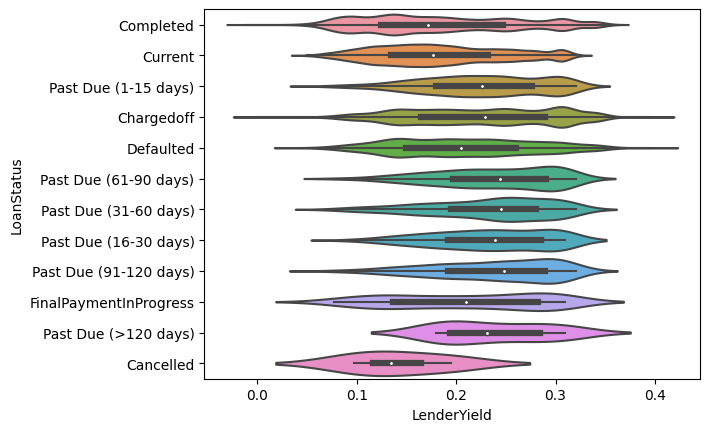

In [385]:
sns.violinplot(x='LenderYield',y='LoanStatus',data=df_loan_status)

## Bi Variate Analysis of IncomeRange and LoanStatus

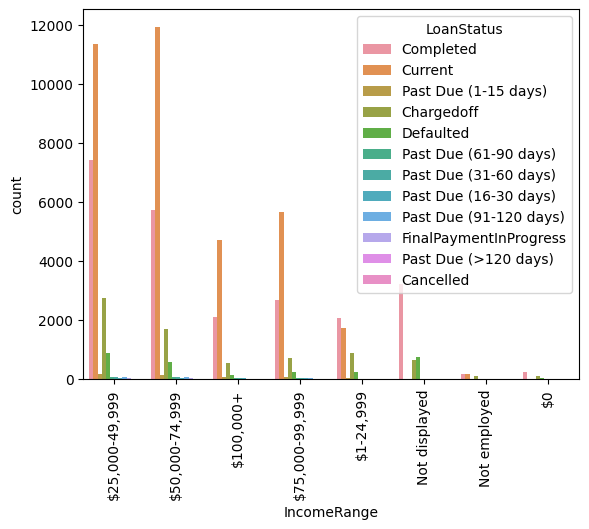

In [386]:
sns.countplot(x='IncomeRange',hue='LoanStatus',data=df_loan_status)
plt.tick_params('x',rotation=90)

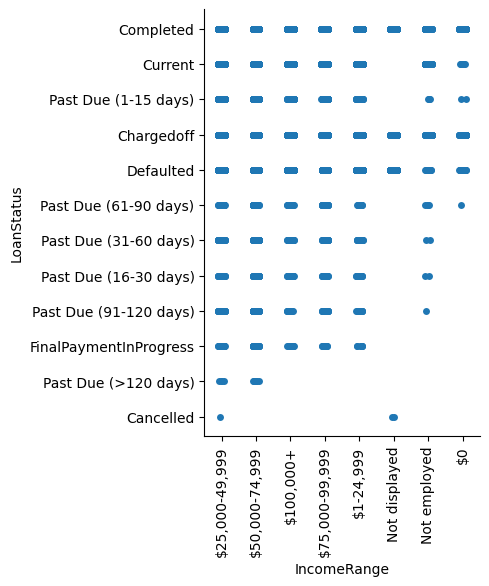

In [387]:
sns.catplot(x='IncomeRange',y='LoanStatus',data=df_loan_status)
plt.tick_params('x',rotation=90)

## Bivariate Analysis of Investors with LoanStatus

<Axes: xlabel='Investors', ylabel='LoanStatus'>

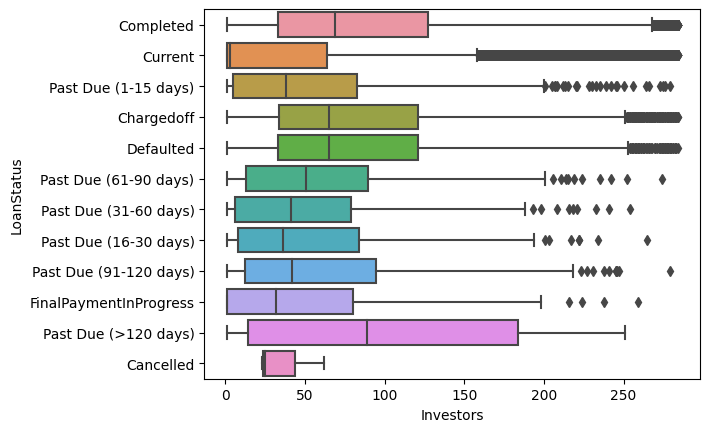

In [388]:
sns.boxplot(x='Investors',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='Investors', ylabel='LoanStatus'>

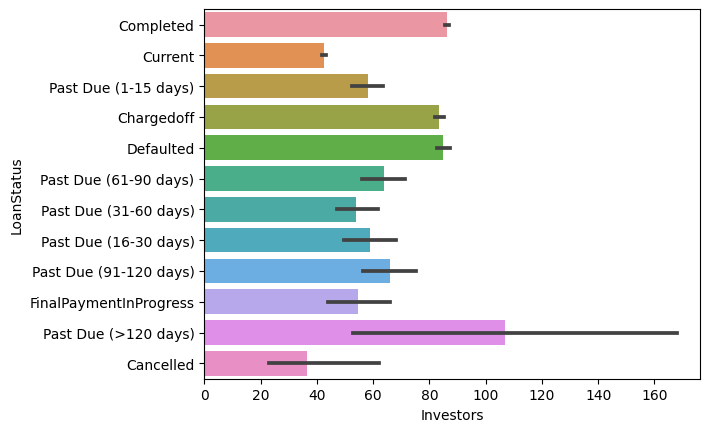

In [389]:
sns.barplot(x='Investors',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='Investors', ylabel='LoanStatus'>

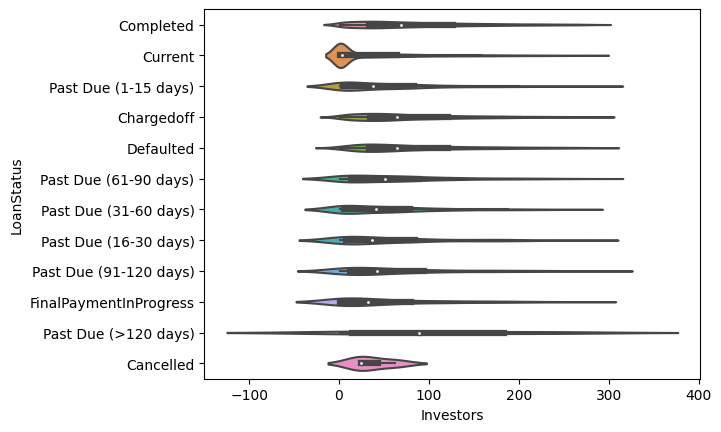

In [390]:
sns.violinplot(x='Investors',y='LoanStatus',data=df_loan_status)

## Bivariate Analysis of LoanOriginalAmount with LoanStatus

<Axes: xlabel='LoanOriginalAmount', ylabel='LoanStatus'>

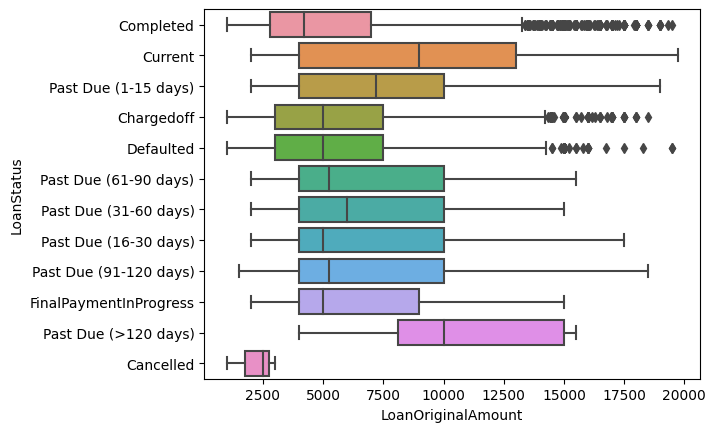

In [391]:
sns.boxplot(x='LoanOriginalAmount',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='LoanOriginalAmount', ylabel='LoanStatus'>

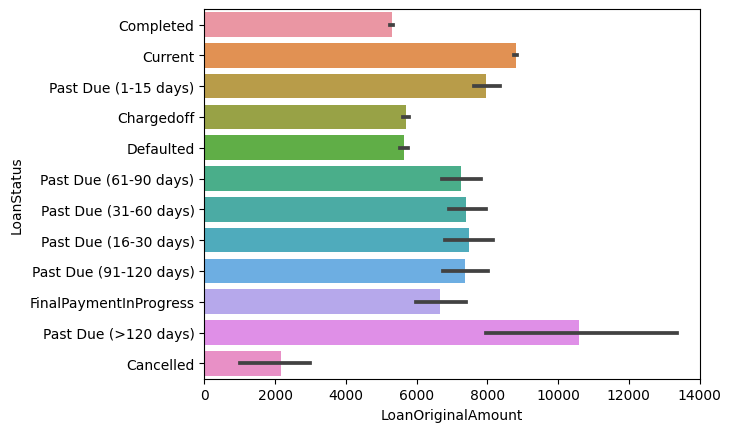

In [392]:
sns.barplot(x='LoanOriginalAmount',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='LoanOriginalAmount', ylabel='LoanStatus'>

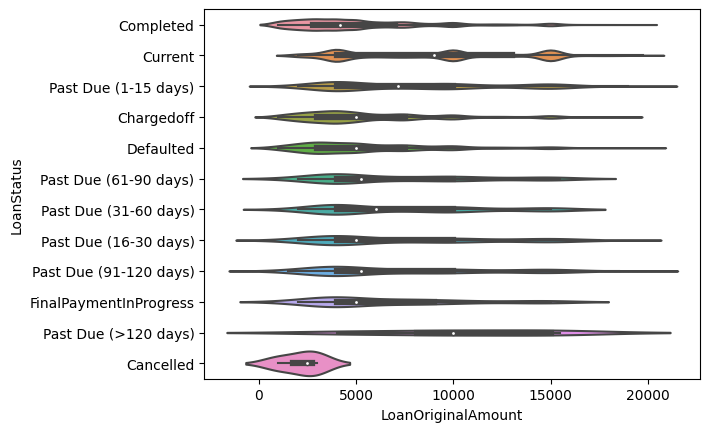

In [393]:
sns.violinplot(x='LoanOriginalAmount',y='LoanStatus',data=df_loan_status)

## Bivaraite Analysis of AvailableBankcardCredit with LoanStatus

<Axes: xlabel='AvailableBankcardCredit', ylabel='LoanStatus'>

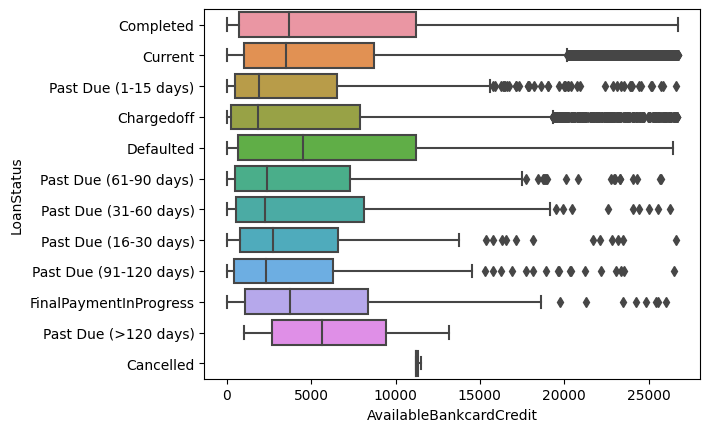

In [394]:
sns.boxplot(x='AvailableBankcardCredit',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='AvailableBankcardCredit', ylabel='LoanStatus'>

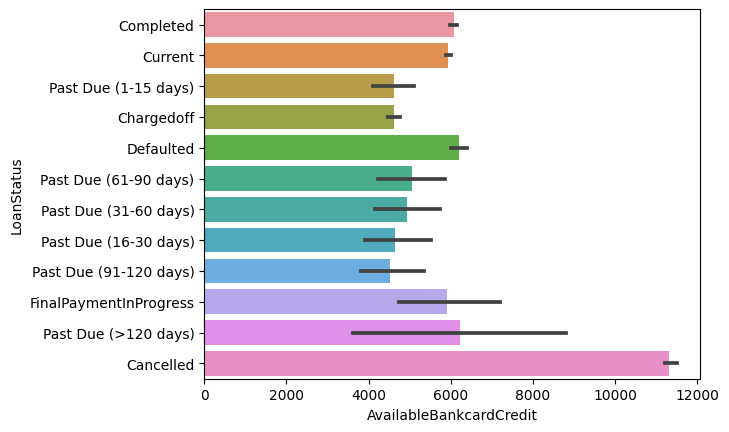

In [395]:
sns.barplot(x='AvailableBankcardCredit',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='AvailableBankcardCredit', ylabel='LoanStatus'>

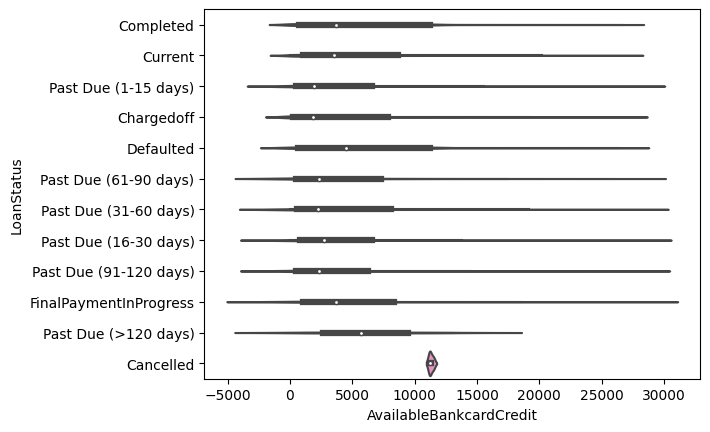

In [396]:
sns.violinplot(x='AvailableBankcardCredit',y='LoanStatus',data=df_loan_status)

## Bivariate Analysis of MonthlyLoanPayment with LoanStatus

<Axes: xlabel='MonthlyLoanPayment', ylabel='LoanStatus'>

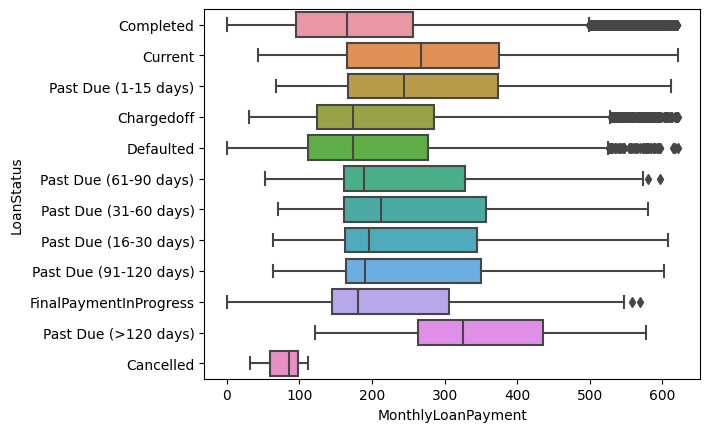

In [397]:
sns.boxplot(x='MonthlyLoanPayment',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='MonthlyLoanPayment', ylabel='LoanStatus'>

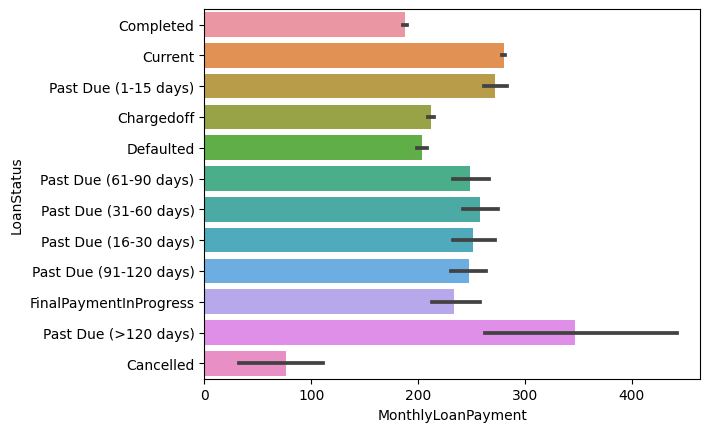

In [398]:
sns.barplot(x='MonthlyLoanPayment',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='MonthlyLoanPayment', ylabel='LoanStatus'>

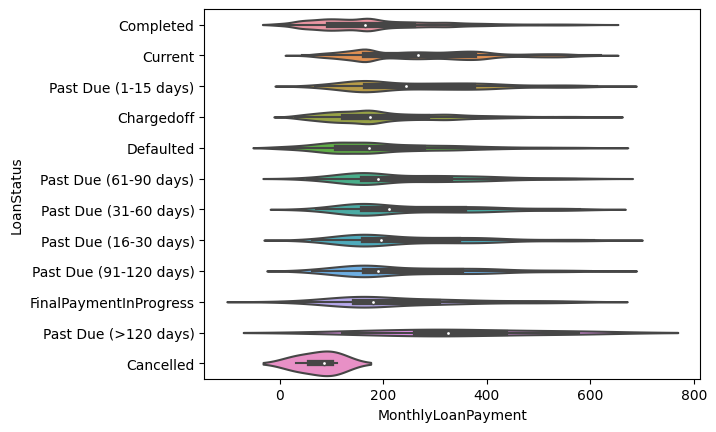

In [399]:
sns.violinplot(x='MonthlyLoanPayment',y='LoanStatus',data=df_loan_status)

## Bivariate Analysis of ListingCategory (numeric) with LoanStatus

<Axes: xlabel='ListingCategory (numeric)', ylabel='LoanStatus'>

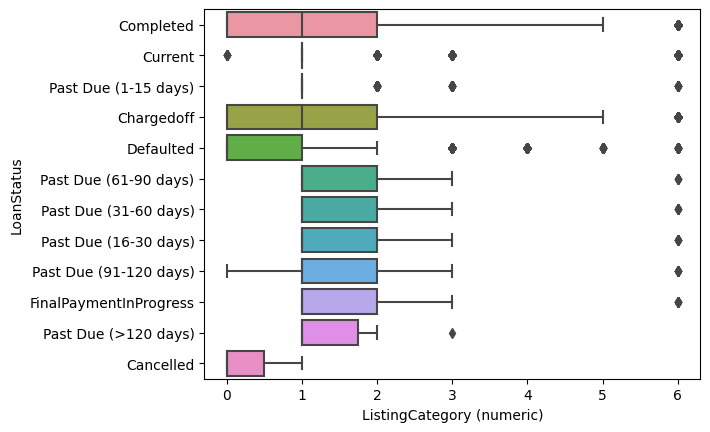

In [400]:
sns.boxplot(x='ListingCategory (numeric)',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='ListingCategory (numeric)', ylabel='LoanStatus'>

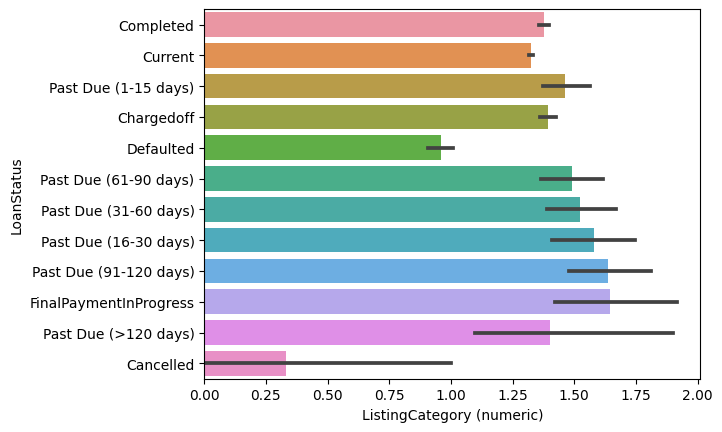

In [401]:
sns.barplot(x='ListingCategory (numeric)',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='ListingCategory (numeric)', ylabel='LoanStatus'>

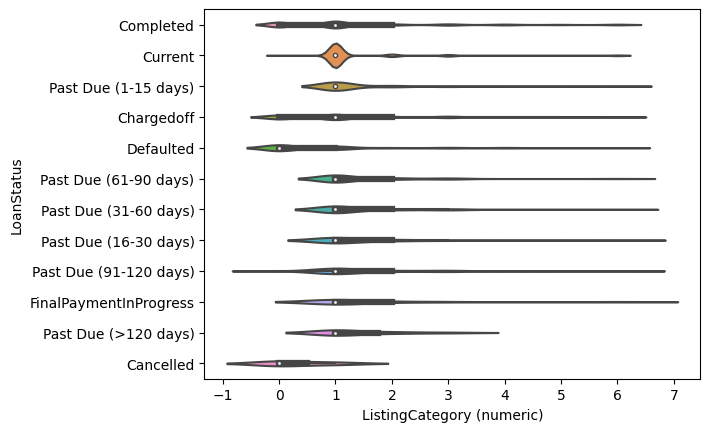

In [402]:
sns.violinplot(x='ListingCategory (numeric)',y='LoanStatus',data=df_loan_status)

## Bivariate Analysis of EmploymentStatus With LoanStatus

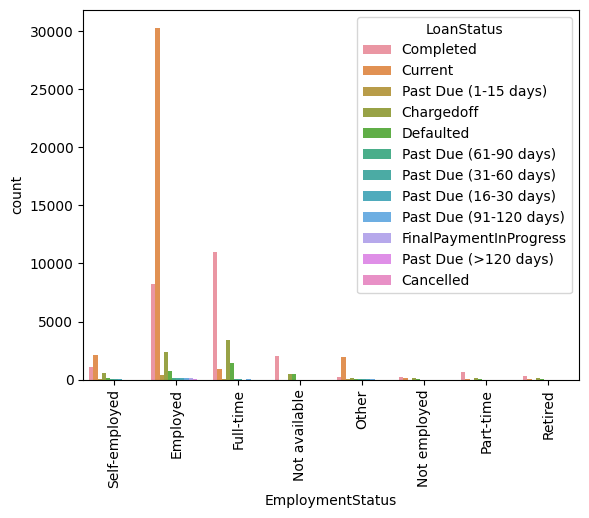

In [403]:
sns.countplot(x='EmploymentStatus',hue='LoanStatus',data=df_loan_status)
plt.tick_params('x',rotation=90)

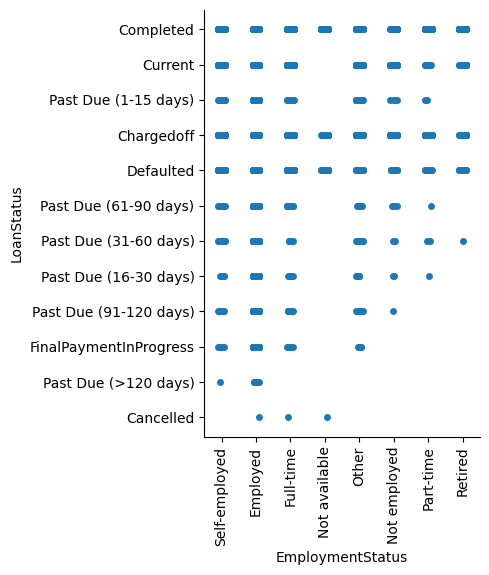

In [404]:
sns.catplot(x='EmploymentStatus',y='LoanStatus',data=df_loan_status)
plt.tick_params('x',rotation=90)

## Bivariate Analysis of IsBorrowerHomeowner with LoanStatus

<Axes: xlabel='IsBorrowerHomeowner', ylabel='count'>

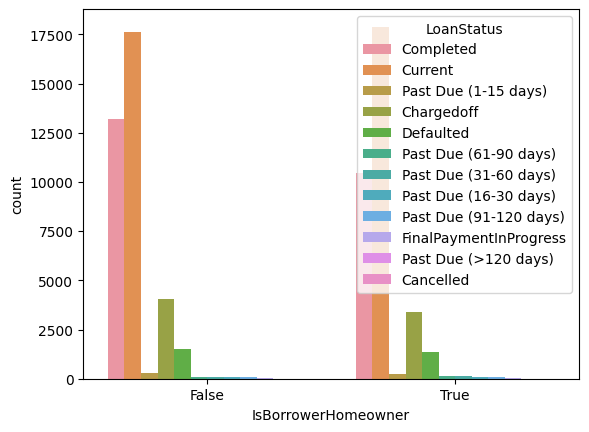

In [405]:
sns.countplot(x='IsBorrowerHomeowner',hue='LoanStatus',data=df_loan_status)

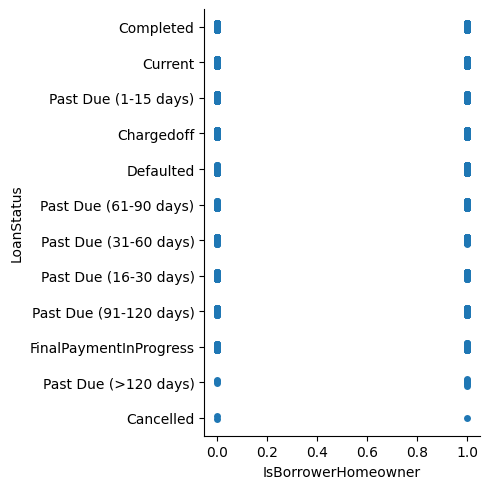

In [406]:
sns.catplot(x='IsBorrowerHomeowner',y='LoanStatus',data=df_loan_status)

## Bivariate Analysis of CreditScoreRangeLower with LoanStatus

<Axes: xlabel='CreditScoreRangeLower', ylabel='LoanStatus'>

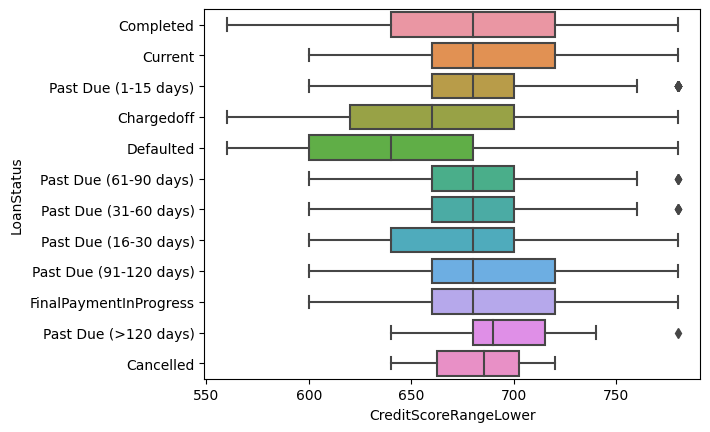

In [407]:
sns.boxplot(x='CreditScoreRangeLower',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='CreditScoreRangeLower', ylabel='LoanStatus'>

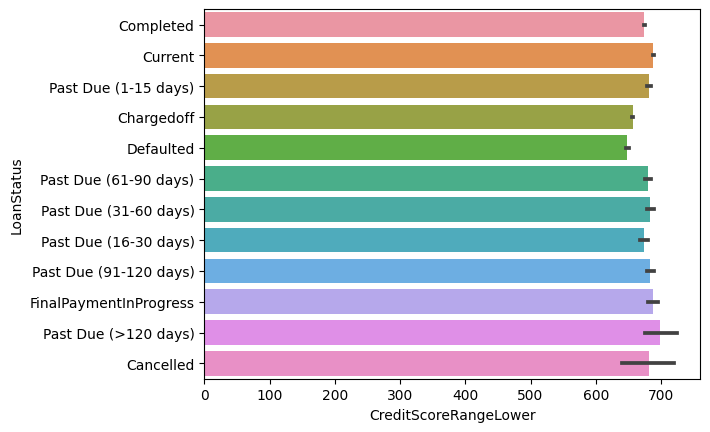

In [408]:
sns.barplot(x='CreditScoreRangeLower',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='CreditScoreRangeLower', ylabel='LoanStatus'>

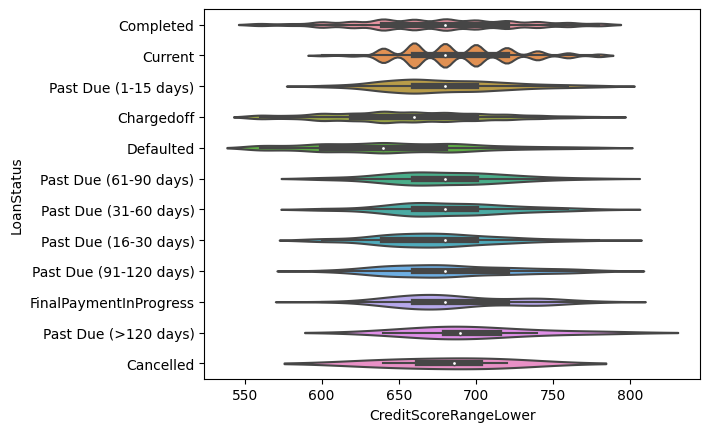

In [409]:
sns.violinplot(x='CreditScoreRangeLower',y='LoanStatus',data=df_loan_status)

## bivariate Analysis of CreditScoreRangeUpper with LoanStatus

<Axes: xlabel='CreditScoreRangeUpper', ylabel='LoanStatus'>

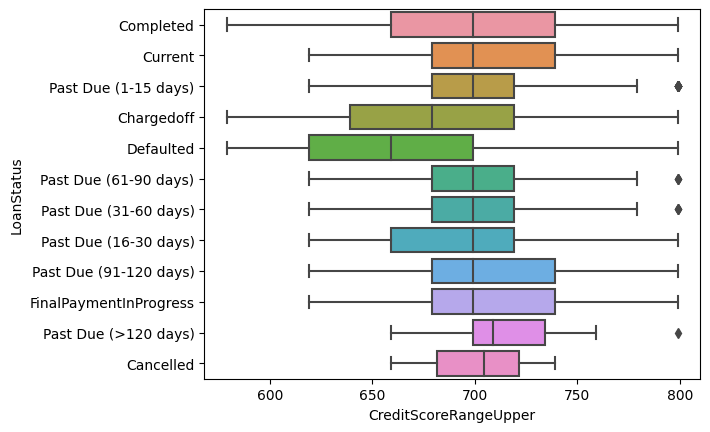

In [410]:
sns.boxplot(x='CreditScoreRangeUpper',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='CreditScoreRangeUpper', ylabel='LoanStatus'>

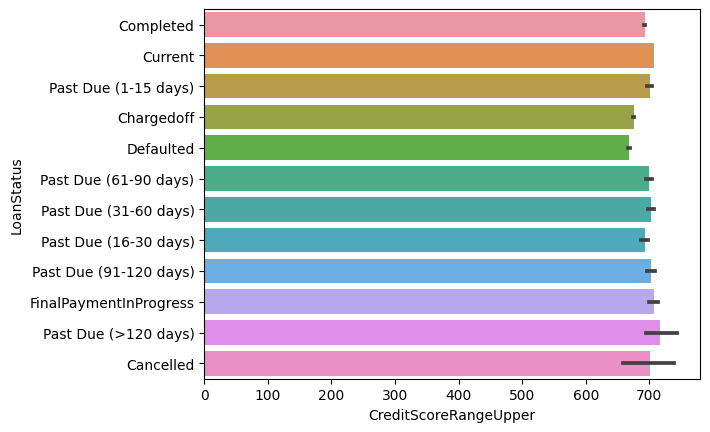

In [411]:
sns.barplot(x='CreditScoreRangeUpper',y='LoanStatus',data=df_loan_status)

<Axes: xlabel='CreditScoreRangeUpper', ylabel='LoanStatus'>

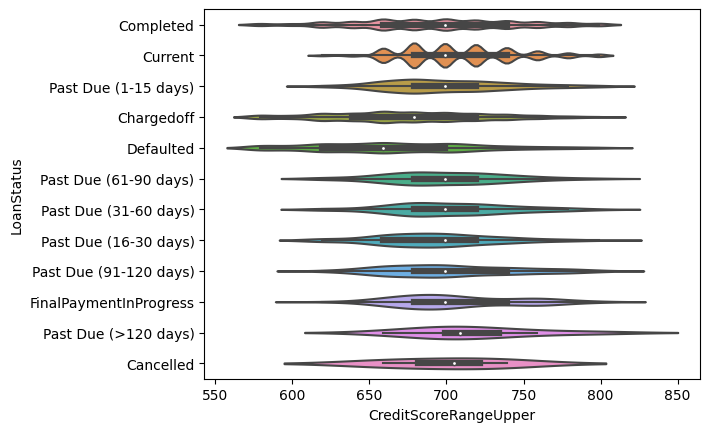

In [412]:
sns.violinplot(x='CreditScoreRangeUpper',y='LoanStatus',data=df_loan_status)

## Multivariate Analysis of Dataset

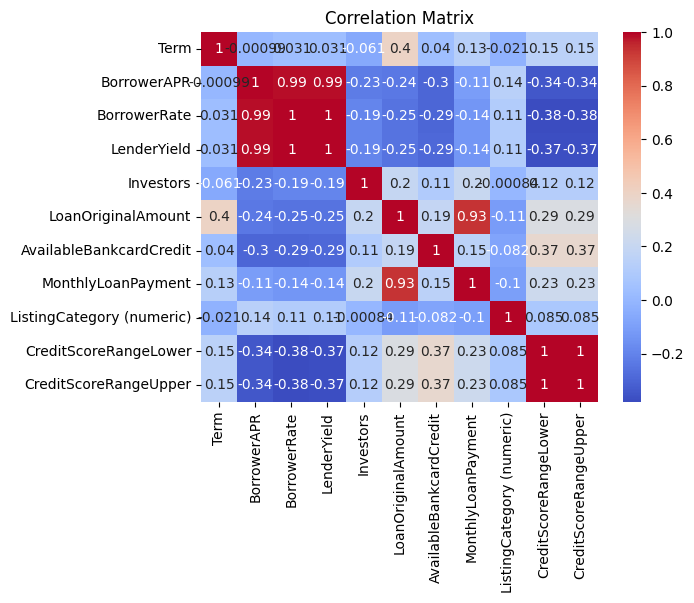

In [413]:
corr = df_loan_status.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

## Selecting Features and Target Variable

In [414]:
y=df_loan_status["LoanStatus"]
x=df_loan_status.drop("LoanStatus",axis=1)  
x=x.select_dtypes(["int","float"])
hot=df_loan_status.select_dtypes(["object"])
print(hot.shape)


(70959, 4)


## LabelEncoding of Target Variable

In [415]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_labels = le.fit_transform(y)
print('Original labels:', y)
print('Encoded labels:', encoded_labels)
y=encoded_labels

Original labels: 0         Completed
1           Current
4           Current
6           Current
7           Current
            ...    
113930      Current
113932      Current
113934      Current
113935    Completed
113936      Current
Name: LoanStatus, Length: 70959, dtype: object
Encoded labels: [2 3 3 ... 3 2 3]


## OneHotEncoding of Variables in X

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
one_hot = encoder.fit_transform(hot.astype('str').values)

In [416]:
hot1=pd.DataFrame(one_hot.toarray())

In [417]:
x = np.concatenate((x.values, hot1.values), axis=1)

In [418]:
x.shape

(70959, 41)

# Training Logistic Regression for Classification of LoanStatus

In [419]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [420]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6561912814731304


# Training Naive Bayes for Classification of LoanStatus

In [421]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [422]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.997510334460729


## Training RandomForestClassifier for Classification of LoanStatus

In [423]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# Create a random forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Print the accuracy score of the model
print("Accuracy:", clf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
# print("Confusion Matrix:\n", cm)

Accuracy: 0.9999530251785044


## Confusion Matrix Of RandomForestClassifier Trained Model predication

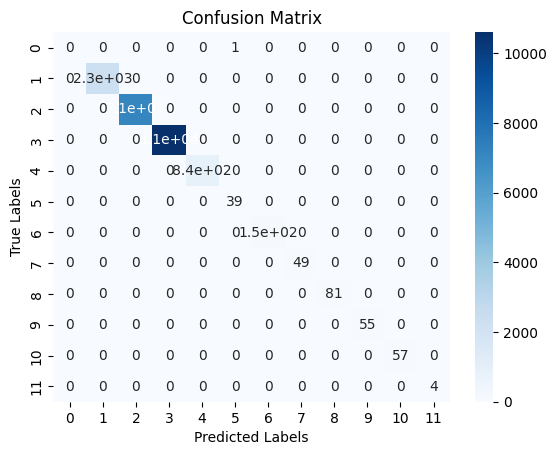

In [424]:
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()